<a href="https://colab.research.google.com/github/AubLambert/FraudDetection/blob/hieu/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

from scipy.stats import chi2_contingency
from scipy.stats import spearmanr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
!pip install catplot

# Basic Analysis

## Import Data

In [3]:
# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Optional: Set the width to avoid line breaks
pd.set_option('display.width', None)

df = pd.read_csv('fraudTrain.csv', on_bad_lines='warn')  # or 'skip' or 'error'
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [4]:
df = df.drop('Unnamed: 0', axis=1)

## Descriptive Statistics

In [5]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [6]:
df.shape

(1296675, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [8]:
df.isnull().sum()

,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0
city,0


In [9]:
df.select_dtypes(include=['int64', 'float64']).nunique()

,0
cc_num,983
amt,52928
zip,970
lat,968
long,969
city_pop,879
unix_time,1274823
merch_lat,1247805
merch_long,1275745
is_fraud,2


In [10]:
df.select_dtypes(include=['object', 'category']).nunique()

,0
trans_date_trans_time,1274791
merchant,693
category,14
first,352
last,481
gender,2
street,983
city,894
state,51
job,494


# EDA

In [11]:
# Create a copy for EDA
df_viz = df.copy()

## Data Transformation

### Fraud Distribution

In [12]:
def fraud_countplot(df, column):
    # Count how many frauds per unique value in column
    fraud_counts = df.groupby(column)["is_fraud"].sum().reset_index()

    plt.figure(figsize=(16,6))
    ax = sns.barplot(
        data=fraud_counts,
        x=column,
        y="is_fraud",
        color="skyblue"   # fraud counts in red
    )

    # Add count labels on top of bars
    for p in ax.patches:
        ax.annotate(
            f"{int(p.get_height())}",      # label = fraud count
            (p.get_x() + p.get_width()/2, p.get_height()),  # position at top
            ha="center", va="bottom",
            fontsize=10, color="black", rotation=0
        )

    plt.title(f"Fraud Count by {column}")
    plt.ylabel("Fraud Count")
    plt.xticks(rotation=45)
    plt.show()

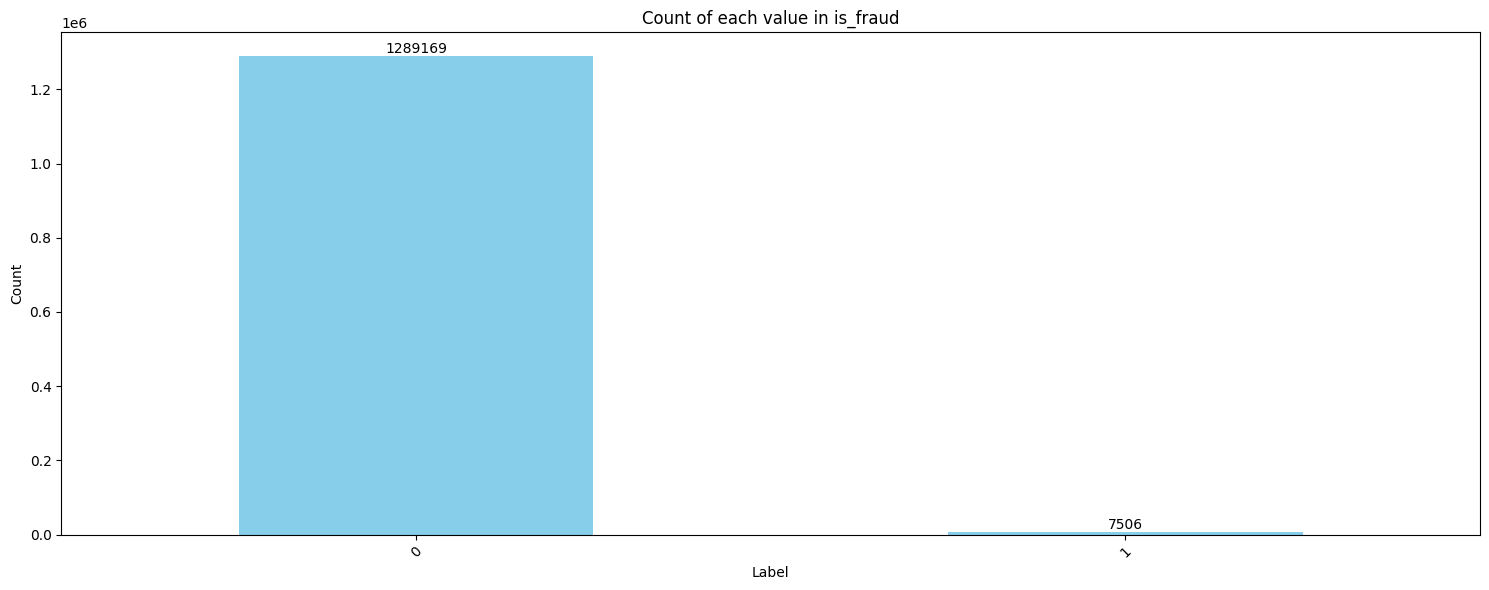

In [13]:
def cat_plot(df, column):
    counts = df[column].value_counts()

    plt.figure(figsize=(15, 6))
    ax = counts.plot(kind='bar', color='skyblue')

    # Add labels on top of bars
    for i, v in enumerate(counts):
        ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10)

    plt.title(f"Count of each value in {column}")
    plt.xlabel("Label")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

cat_plot(df_viz, "is_fraud")

In [14]:
fraud_percent = (df['is_fraud'] == 1).sum()/(df.shape[0])

print(f"Fraud Percentage: {fraud_percent * 100:.5f}%")

Fraud Percentage: 0.57887%


### Correlation

In [15]:
def spearman_corr(df):
    spearman_results = {}

    cat_features = df_viz.select_dtypes(include=["object"])

    for col in cat_features.columns:
        rho, pval = spearmanr(df[col], df["is_fraud"])
        spearman_results[col] = (rho, pval)

    # For all numerical features vs target
    num_features = df_viz.select_dtypes(include=["int64", "float64"]).drop(columns=["is_fraud"])

    for col in num_features.columns:
        rho, pval = spearmanr(df[col], df["is_fraud"])
        spearman_results[col] = (rho, pval)

    spearman_df = pd.DataFrame(spearman_results, index=["rho", "pval"]).T
    print(spearman_df.sort_values("rho", ascending=False))

#### Numerical correlation

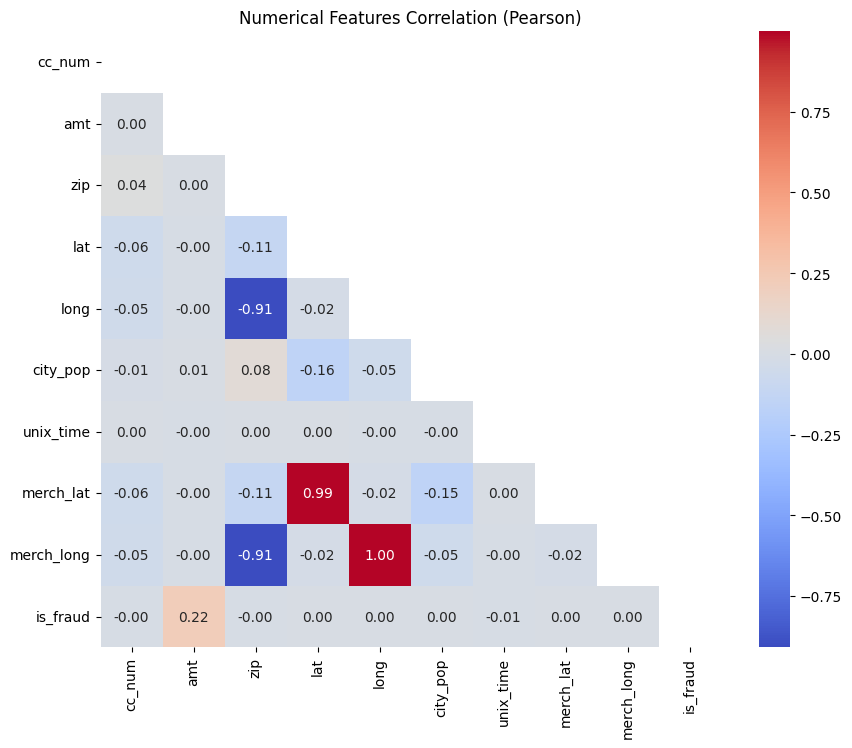

/tmp/ipython-input-170565288.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features_signed.values, y=top_features_signed.index, palette="coolwarm")


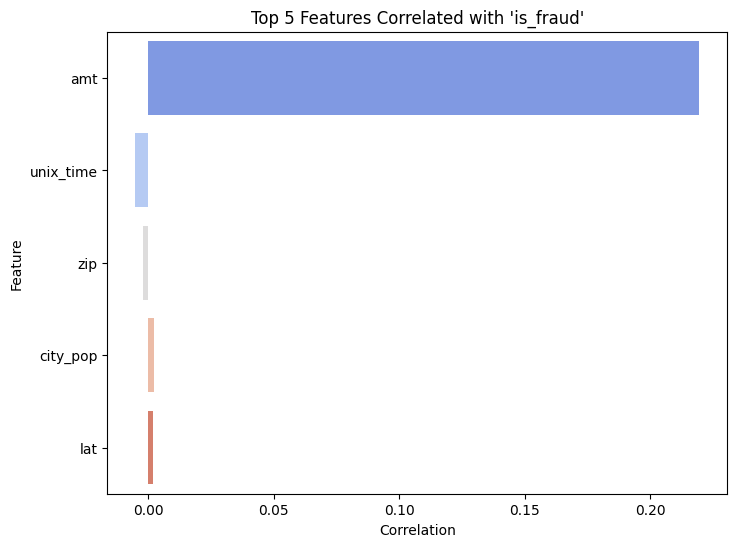

In [16]:
def num_corr(df, target="is_fraud", n=5):
    # Select numerical columns
    num_cols = df.select_dtypes(include=['int32', 'int64', 'float64'])

    # Pearson correlation matrix
    corr_num = num_cols.corr()

    # If target not in numerical columns
    if target not in corr_num.columns:
        raise ValueError(f"Target '{target}' not found among numerical columns.")

    # Extract correlations with target
    corr_target = corr_num[target].drop(target)  # drop self-correlation

    # Get top n absolute correlations
    top_features = corr_target.abs().sort_values(ascending=False).head(n)
    top_features_signed = corr_target.loc[top_features.index]  # keep sign for bar chart

    # --- Plot heatmap of all correlations ---
    mask = np.triu(np.ones_like(corr_num, dtype=bool))
    plt.figure(figsize=(10,8))
    sns.heatmap(corr_num, mask=mask, cmap="coolwarm", annot=True, fmt=".2f", cbar=True)
    plt.title("Numerical Features Correlation (Pearson)")
    plt.show()

    # --- Plot bar chart of top n correlations ---
    plt.figure(figsize=(8,6))
    sns.barplot(x=top_features_signed.values, y=top_features_signed.index, palette="coolwarm")
    plt.title(f"Top {n} Features Correlated with '{target}'")
    plt.xlabel("Correlation")
    plt.ylabel("Feature")
    plt.show()

num_corr(df_viz)

#### Categorical correlation

In [17]:
df_viz_samp = df_viz.drop(["trans_date_trans_time", "dob", "trans_num"], axis=1)

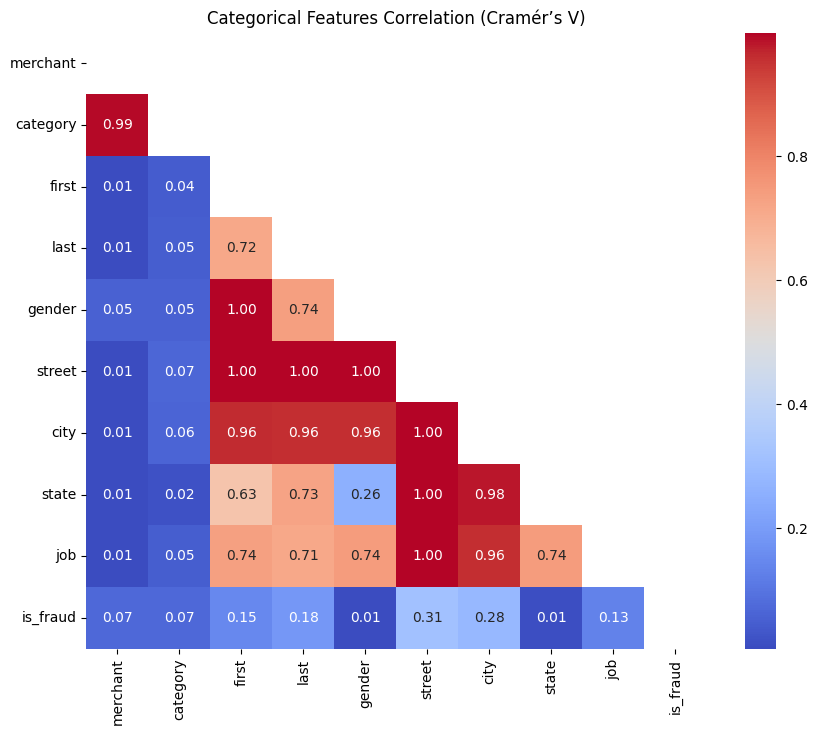

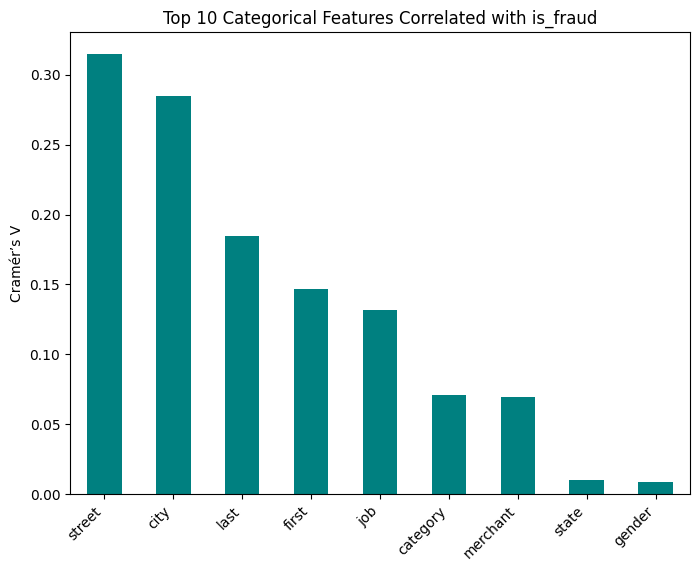

In [18]:
def cat_corr(df, n=10):
    def cramers_v(x, y):
        confusion_matrix = pd.crosstab(x, y)
        chi2 = chi2_contingency(confusion_matrix)[0]
        n_obs = confusion_matrix.sum().sum()
        phi2 = chi2 / n_obs
        r, k = confusion_matrix.shape
        phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n_obs-1))
        rcorr = r - ((r-1)**2) / (n_obs-1)
        kcorr = k - ((k-1)**2) / (n_obs-1)
        return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

    # Sample to reduce computation cost
    df_viz_samp = df.sample(frac=0.1, random_state=42)
    df_viz_samp["is_fraud"] = df_viz_samp["is_fraud"].astype("category")
    cat_cols = df_viz_samp.select_dtypes(include=["object", "category"]).astype("category")

    # Compute Cramér’s V with is_fraud
    corr_with_target = {}
    for c in cat_cols.columns:
        if c != "is_fraud":
            corr_with_target[c] = cramers_v(cat_cols[c], df_viz_samp["is_fraud"])

    # Sort by strength
    sorted_corr = pd.Series(corr_with_target).sort_values(ascending=False)

    # --- Heatmap (all categorical pairs) ---
    corr_cat = pd.DataFrame(np.zeros((len(cat_cols.columns), len(cat_cols.columns))),
                            index=cat_cols.columns, columns=cat_cols.columns)
    for c1 in cat_cols.columns:
        for c2 in cat_cols.columns:
            corr_cat.loc[c1, c2] = cramers_v(cat_cols[c1], cat_cols[c2])

    mask = np.triu(np.ones_like(corr_cat, dtype=bool))
    plt.figure(figsize=(10,8))
    sns.heatmap(corr_cat, mask=mask, cmap="coolwarm", annot=True, fmt=".2f", cbar=True)
    plt.title("Categorical Features Correlation (Cramér’s V)")
    plt.show()

    # --- Bar chart (top-N with is_fraud) ---
    plt.figure(figsize=(8,6))
    sorted_corr.head(n).plot(kind="bar", color="teal")
    plt.title(f"Top {n} Categorical Features Correlated with is_fraud")
    plt.ylabel("Cramér’s V")
    plt.xticks(rotation=45, ha="right")
    plt.show()

cat_corr(df_viz_samp)

In [19]:
df_viz_2 = df_viz.copy()

### Date and Time Heatmap


#### Transaction

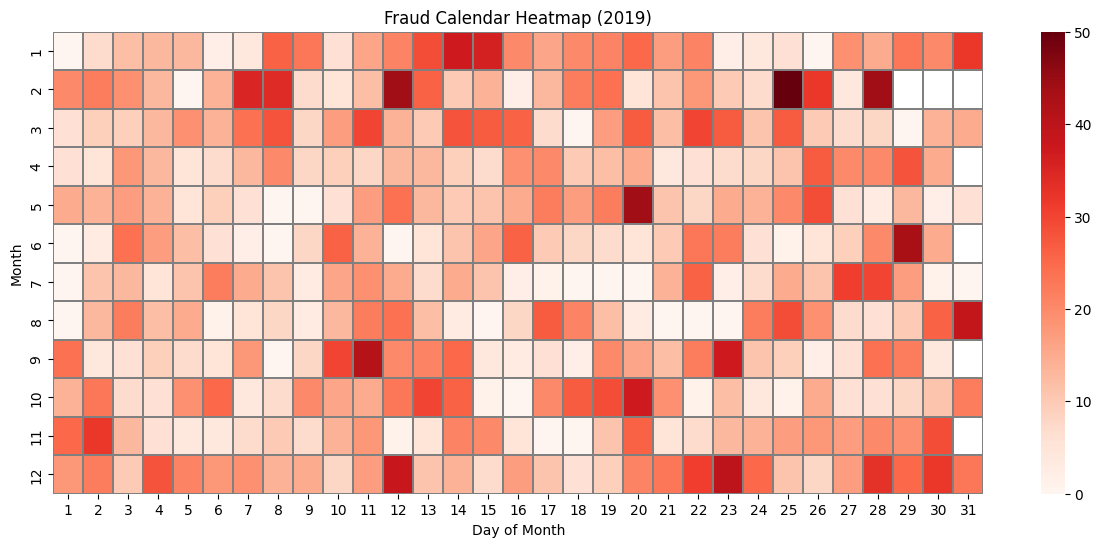

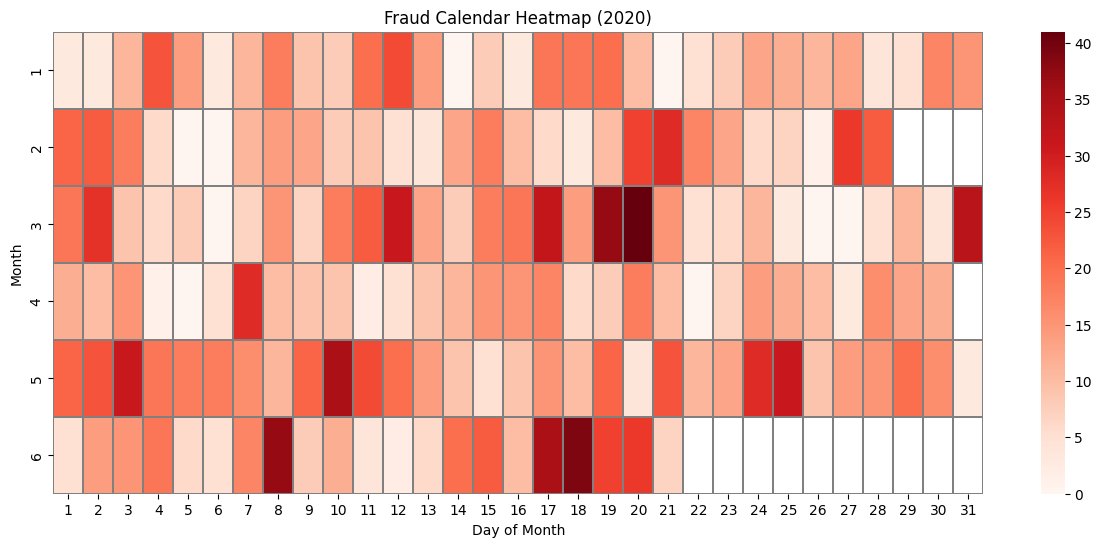

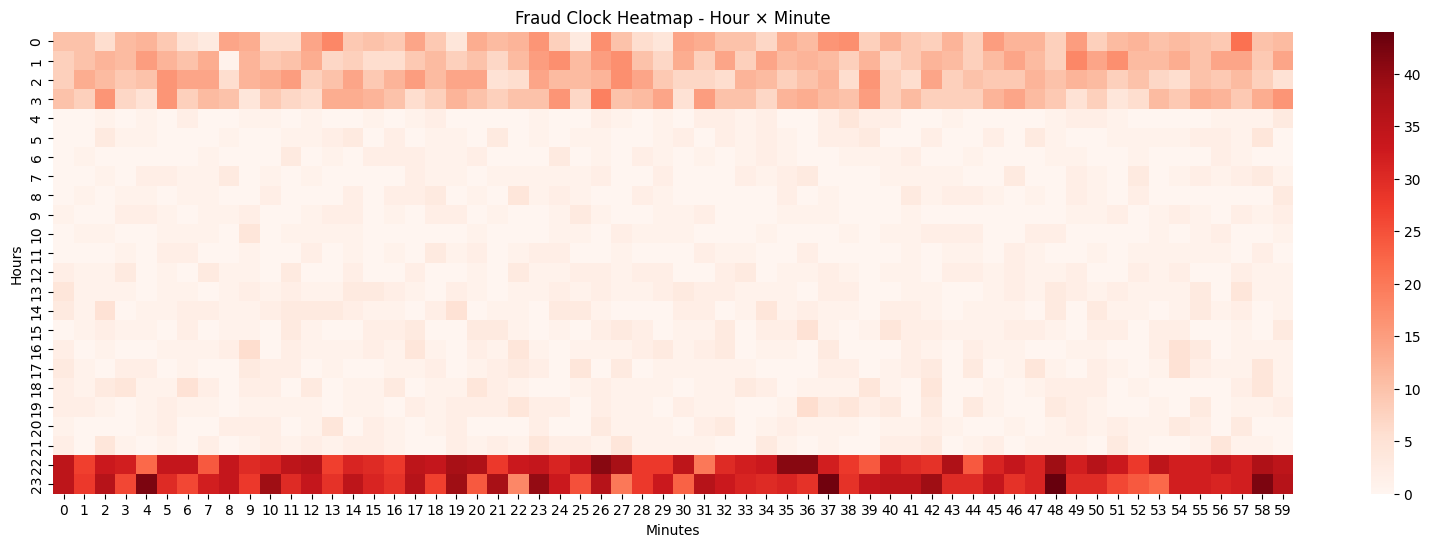

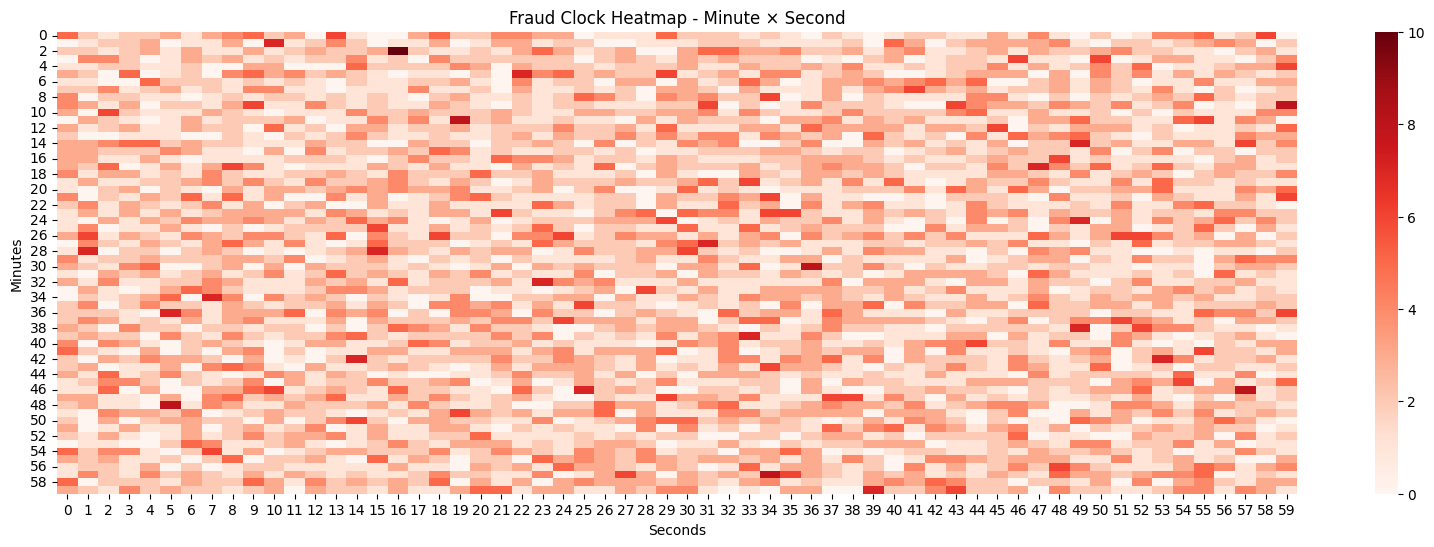

In [20]:
df_viz_2["trans_date_trans_time"] = pd.to_datetime(df_viz_2["trans_date_trans_time"])
df_viz_2["year"] = df_viz_2["trans_date_trans_time"].dt.year
df_viz_2["month"] = df_viz_2["trans_date_trans_time"].dt.month
df_viz_2["day"] = df_viz_2["trans_date_trans_time"].dt.day
df_viz_2["hour"] = df_viz_2["trans_date_trans_time"].dt.hour
df_viz_2["minute"] = df_viz_2["trans_date_trans_time"].dt.minute
df_viz_2["second"] = df_viz_2["trans_date_trans_time"].dt.second

# =====================================================
# 1) CALENDAR HEATMAP (Year × Month × Day)
# =====================================================
fraud_calendar = df_viz_2.groupby(["year","month","day"])["is_fraud"].sum().reset_index()

for yr in sorted(fraud_calendar["year"].unique()):
    pivoted = fraud_calendar[fraud_calendar["year"]==yr].pivot(
        index="month", columns="day", values="is_fraud"
    )

    plt.figure(figsize=(15,6))
    sns.heatmap(pivoted, cmap="Reds", cbar=True, linewidths=0.1, linecolor="grey")
    plt.title(f"Fraud Calendar Heatmap ({yr})")
    plt.xlabel("Day of Month")
    plt.ylabel("Month")
    plt.show()

# =====================================================
# 2) CLOCK HEATMAP (Hour × Minute)
# =====================================================

fraud_clock_min = df_viz_2.groupby(["hour","minute"])["is_fraud"].sum().reset_index()

pivoted_clock_min = fraud_clock_min.pivot_table(
    index="hour", columns="minute", values="is_fraud", fill_value=0
)

plt.figure(figsize=(20,6))
sns.heatmap(pivoted_clock_min, cmap="Reds", cbar=True)
plt.title("Fraud Clock Heatmap - Hour × Minute")
plt.xlabel("Minutes")
plt.ylabel("Hours")
plt.show()

fraud_clock_sec = df_viz_2.groupby(["minute","second"])["is_fraud"].sum().reset_index()

pivoted_clock_sec = fraud_clock_sec.pivot_table(
    index="minute", columns="second", values="is_fraud", fill_value=0
)

plt.figure(figsize=(20,6))
sns.heatmap(pivoted_clock_sec, cmap="Reds", cbar=True)
plt.title("Fraud Clock Heatmap - Minute × Second")
plt.xlabel("Seconds")
plt.ylabel("Minutes")
plt.show()

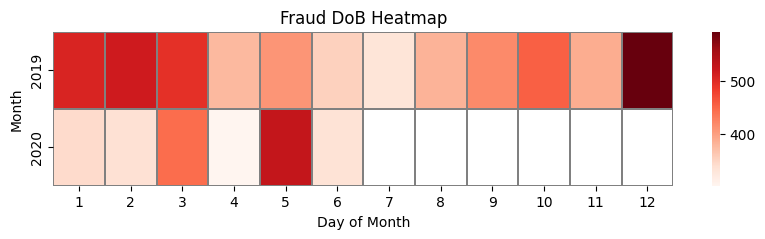

In [21]:
fraud_yearmonth = df_viz_2.groupby(["year","month"])["is_fraud"].sum().reset_index()

pivoted = fraud_yearmonth.pivot(
    index="year", columns="month", values="is_fraud"
)

plt.figure(figsize=(10,2))
sns.heatmap(pivoted, cmap="Reds", cbar=True, linewidths=0.1, linecolor="grey")
plt.title(f"Fraud DoB Heatmap")
plt.xlabel("Day of Month")
plt.ylabel("Month")
plt.show()

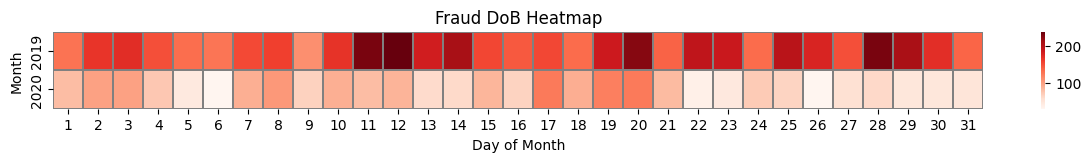

In [22]:
fraud_yearmonth = df_viz_2.groupby(["year","day"])["is_fraud"].sum().reset_index()

pivoted = fraud_yearmonth.pivot(
    index="year", columns="day", values="is_fraud"
)

plt.figure(figsize=(15,1))
sns.heatmap(pivoted, cmap="Reds", cbar=True, linewidths=0.1, linecolor="grey")
plt.title(f"Fraud DoB Heatmap")
plt.xlabel("Day of Month")
plt.ylabel("Month")
plt.show()

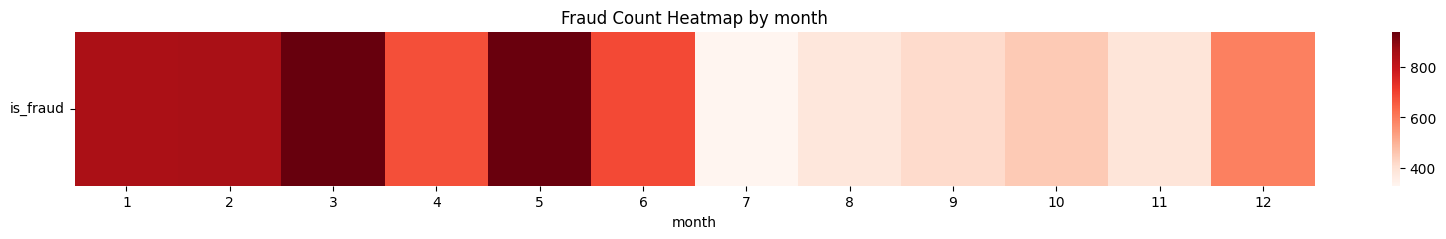

In [23]:
def feature_to_target(df, column):
    partition = df.groupby(column)["is_fraud"].sum().reset_index()

    # reshape into 1-row dataframe
    heatmap_data = partition.set_index(column).T

    plt.figure(figsize=(20, 2))
    sns.heatmap(
        heatmap_data,
        cmap="Reds",
        annot=False,  # disable is_fraud count labels
        cbar=True
    )
    plt.title(f"Fraud Count Heatmap by {column}")
    plt.yticks(rotation=0)
    plt.show()

feature_to_target(df_viz_2, "month")

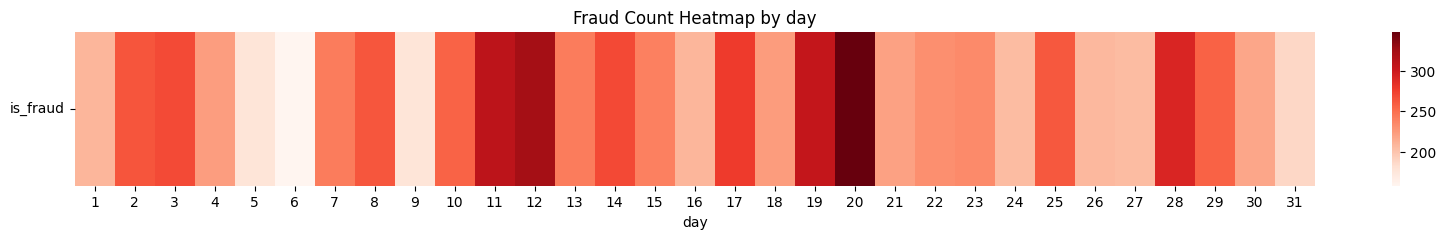

In [24]:
feature_to_target(df_viz_2, "day")

#### DoB

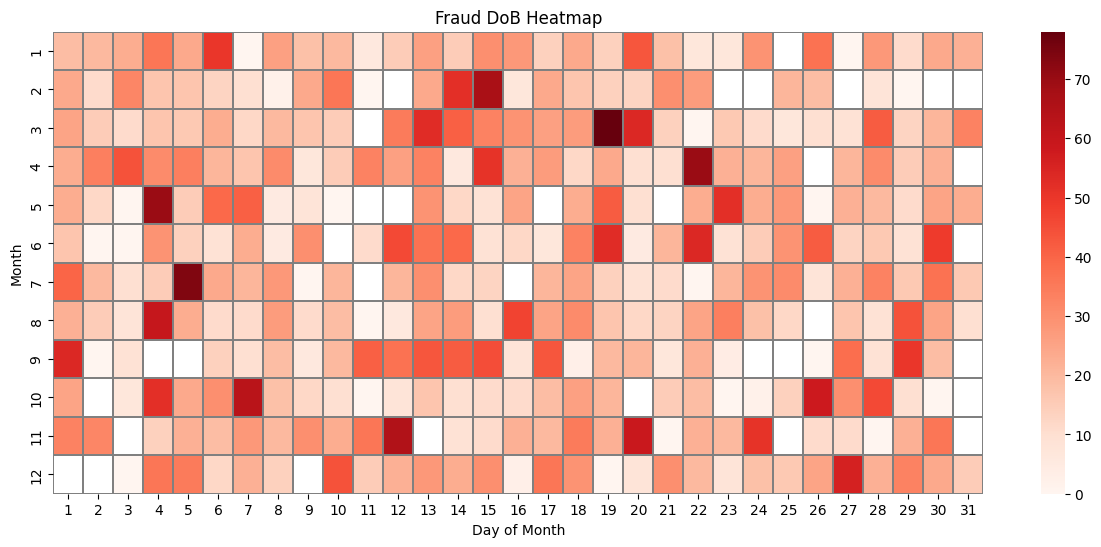

In [25]:
df_viz_2["dob"] = pd.to_datetime(df_viz_2["dob"])
df_viz_2["dob_year"] = df_viz_2["dob"].dt.year
df_viz_2["dob_month"] = df_viz_2["dob"].dt.month
df_viz_2["dob_day"] = df_viz_2["dob"].dt.day

fraud_dob = df_viz_2.groupby(["dob_month","dob_day"])["is_fraud"].sum().reset_index()

pivoted = fraud_dob.pivot(
    index="dob_month", columns="dob_day", values="is_fraud"
)

plt.figure(figsize=(15,6))
sns.heatmap(pivoted, cmap="Reds", cbar=True, linewidths=0.1, linecolor="grey")
plt.title(f"Fraud DoB Heatmap")
plt.xlabel("Day of Month")
plt.ylabel("Month")
plt.show()

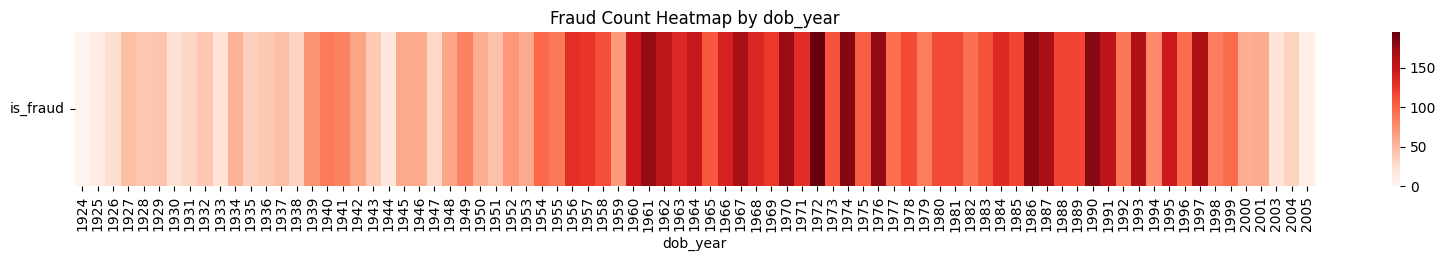

In [26]:
feature_to_target(df_viz_2, "dob_year")

### Seperate transaction hour and dob_year

In [27]:
def assign_generation(year):
    if year >= 2013:
        return "Gen Alpha"
    elif year >= 1997:
        return "Gen Z"
    elif year >= 1981:
        return "Millennial"
    elif year >= 1965:
        return "Gen X"
    elif year >= 1946:
        return "Baby Boomer"
    elif year >= 1928:
        return "Silent"
    else:
        return "Greatest"

df_viz_2["generation"] = df_viz_2["dob_year"].apply(assign_generation)

### Concatenate customer_name

In [28]:
df_viz_2["customer_name"] = df_viz_2["first"].str.cat(df_viz_2["last"], sep=' ')

In [29]:
df_viz_2["customer_name"].nunique()

973

In [30]:
df_viz_2 = df_viz_2.drop(["first", "last"], axis=1)

### Split merchant prefix

In [31]:
df_viz_2["merchant"].str.startswith("fraud_").sum()

np.int64(1296675)

In [32]:
# df_viz["merchant"] = df_viz["merchant"].str.removeprefix("fraud_")
# df_viz["merchant"].nunique()

### Split street components

In [33]:
splits = df_viz_2["street"].str.split(" ", expand=True)

# Assign to new columns sequentially
df_viz_2["str_number"]    = splits[0]
df_viz_2["str_name"]      = splits[1]
df_viz_2["str_type"]      = splits[2]
df_viz_2["building_type"] = splits[3]
df_viz_2["room_number"]   = splits[4]

df_viz_2 = df_viz_2.drop('street', axis=1)

In [34]:
df_viz_2.nunique()

,0
trans_date_trans_time,1274791
cc_num,983
merchant,693
category,14
amt,52928
gender,2
city,894
state,51
zip,970
lat,968


In [35]:
df_viz_2["building_type"] = df_viz_2["building_type"].replace({None: "House"})

### Drop city

In [36]:
df_viz_2 = df_viz_2.drop("city", axis=1)

### Split zip prefix

In [37]:
df_viz_2["zip"] = df_viz_2["zip"].astype(str).str.zfill(5)

# Extract first 3 digits (ZIP prefix / metro area)
df_viz_2["zip_prefix"] = df_viz_2["zip"].str[:3]

In [38]:
df_viz_2["zip_prefix"].nunique()

526

In [39]:
df_viz_2["zip_prefix"].astype(int)
df_viz_2 = df_viz_2.drop("zip", axis=1)

### Calculate distance (km) between merchants and customers

In [40]:
def haversine_vectorized(lat1, lon1, lat2, lon2):
    # Convert to radians
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Earth radius in kilometers
    return r * c

# Example usage with your DataFrame df
df_viz_2['distance_km'] = haversine_vectorized(
    df_viz_2['lat'], df_viz_2['long'], df_viz_2['merch_lat'], df_viz_2['merch_long']
)

### Overwrite job

In [41]:
df_viz_2["job"].nunique()

494

In [42]:
# job_splits = df_viz_2["job"].str.split(",")

# # Find maximum number of jobs in any row
# max_jobs = job_splits.map(len).max()

# # Create new DataFrame with expanded columns
# job_df = pd.DataFrame(job_splits.tolist(), index=df.index)

# # Rename columns as job1, job2, ...
# job_df.columns = [f"job{i+1}" for i in range(max_jobs)]

# # Concatenate back with original df
# df_sample = pd.concat([df_viz_2.drop(columns=["job"]), job_df], axis=1)

In [43]:
# df_sample.info()

In [44]:
# df_sample["job1"].unique()

In [45]:
# df_sample["job2"].unique()

In [46]:
# Overwrite 'job' with only the first element before the comma
df_viz_2["job"] = df_viz_2["job"].str.split(",").str[0].str.strip()

In [47]:
df_viz_2["job"]

,job
0,Psychologist
1,Special educational needs teacher
2,Nature conservation officer
3,Patent attorney
4,Dance movement psychotherapist
...,...
1296670,Geoscientist
1296671,Production assistant
1296672,Naval architect
1296673,Volunteer coordinator


### Calculating age

In [48]:
df_viz_2["age"] = df_viz_2["year"] - df_viz_2["dob_year"]

### Number of cc per customer

In [49]:
# Number of unique cards per customer
df_viz_2["n_cc"] = df_viz_2.groupby("customer_name")["cc_num"].transform("nunique")

### Drop datetime columns (trans_date_trans_time, dob), trans_num

#### Rewrite unix_time

In [50]:
# As the original unix_time is not appropriate, I will drop it
df_viz_2 = df_viz_2.drop("unix_time", axis=1)

In [51]:
df_viz_2["trans_date_trans_time"] = pd.to_datetime(df_viz_2["trans_date_trans_time"])

# Create a new column with unix_time (seconds since epoch)
df_viz_2["unix_time"] = df_viz_2["trans_date_trans_time"].astype(int) // 10**9

#### Drop columns

In [52]:
# Keep the rest for analysis
df_viz_samp2 = df_viz_2.drop(["trans_date_trans_time", "dob", "trans_num"], axis=1)

### Correlation after transformation

In [53]:
target_col = "is_fraud"   # replace with your target column name

# Move target column to the end
def reorder(df):
    cols = [c for c in df.columns if c != target_col] + [target_col]
    df = df[cols]
    return df

reorder(df_viz_samp2)

,cc_num,merchant,category,amt,gender,state,lat,long,city_pop,job,merch_lat,merch_long,year,month,day,hour,minute,second,dob_year,dob_month,dob_day,generation,customer_name,str_number,str_name,str_type,building_type,room_number,zip_prefix,distance_km,age,n_cc,unix_time,is_fraud
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,NC,36.0788,-81.1781,3495,Psychologist,36.011293,-82.048315,2019,1,1,0,0,18,1988,3,9,Millennial,Jennifer Banks,561,Perry,Cove,House,None,286,78.597568,31,1,1546300818,0
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,WA,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,2019,1,1,0,0,44,1978,6,21,Gen X,Stephanie Gill,43039,Riley,Greens,Suite,393,991,30.212176,41,1,1546300844,0
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,ID,42.1808,-112.2620,4154,Nature conservation officer,43.150704,-112.154481,2019,1,1,0,0,51,1962,1,19,Baby Boomer,Edward Sanchez,594,White,Dale,Suite,530,832,108.206083,57,1,1546300851,0
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,MT,46.2306,-112.1138,1939,Patent attorney,47.034331,-112.561071,2019,1,1,0,1,16,1967,1,12,Gen X,Jeremy White,9443,Cynthia,Court,Apt.,038,596,95.673231,52,1,1546300876,0
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,VA,38.4207,-79.4629,99,Dance movement psychotherapist,38.674999,-78.632459,2019,1,1,0,3,6,1986,3,28,Millennial,Tyler Garcia,408,Bradley,Rest,House,None,244,77.556744,33,1,1546300986,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,30263540414123,fraud_Reichel Inc,entertainment,15.56,M,UT,37.7175,-112.4777,258,Geoscientist,36.841266,-111.690765,2020,6,21,12,12,8,1961,11,24,Baby Boomer,Erik Patterson,162,Jessica,Row,Apt.,072,847,119.752136,59,1,1592741528,0
1296671,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,M,MD,39.2667,-77.5101,100,Production assistant,38.906881,-78.246528,2020,6,21,12,12,19,1979,12,11,Gen X,Jeffrey White,8617,Holmes,Terrace,Suite,651,217,75.104085,41,1,1592741539,0
1296672,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,M,NM,32.9396,-105.8189,899,Naval architect,33.619513,-105.130529,2020,6,21,12,12,32,1967,8,30,Gen X,Christopher Castaneda,1632,Cohen,Drive,Suite,639,883,99.047734,53,1,1592741552,0
1296673,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,SD,43.3526,-102.5411,1126,Volunteer coordinator,42.788940,-103.241160,2020,6,21,12,13,36,1980,8,18,Gen X,Joseph Murray,42933,Ryan,Underpass,House,None,577,84.627652,40,1,1592741616,0


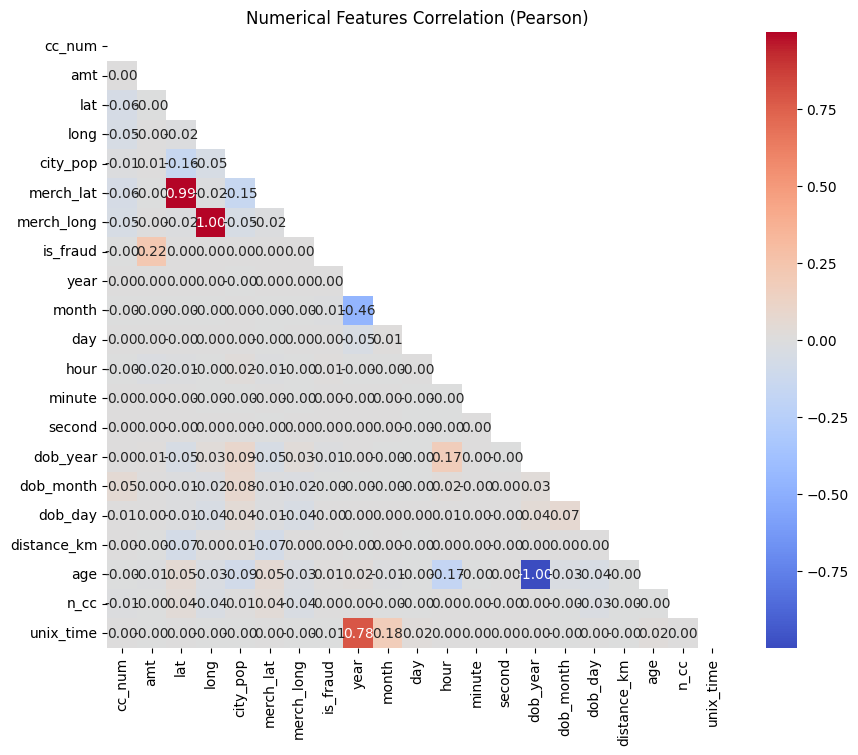

/tmp/ipython-input-170565288.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features_signed.values, y=top_features_signed.index, palette="coolwarm")


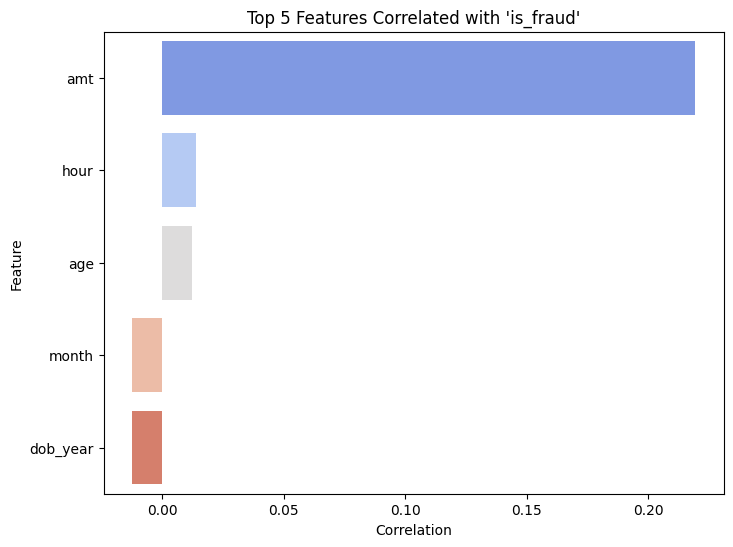

In [54]:
num_corr(df_viz_samp2)

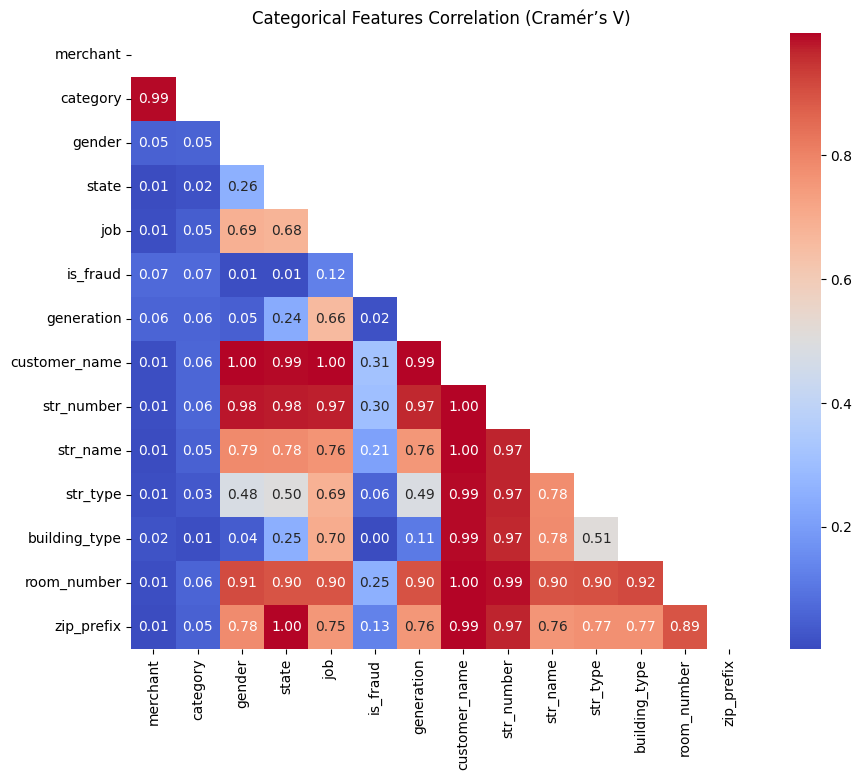

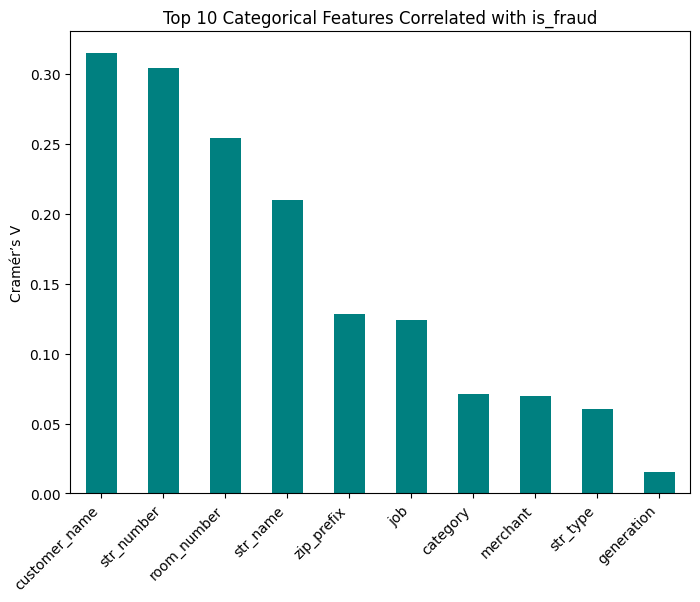

In [55]:
cat_corr(df_viz_samp2)

In [56]:
df_viz_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 37 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   gender                 1296675 non-null  object        
 6   state                  1296675 non-null  object        
 7   lat                    1296675 non-null  float64       
 8   long                   1296675 non-null  float64       
 9   city_pop               1296675 non-null  int64         
 10  job                    1296675 non-null  object        
 11  dob                    1296675 non-null  datetime64[ns]
 12  trans_num              12966

## Relationship Analysis

### Fraud Rate by Category Spending

/tmp/ipython-input-3979180993.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(fraud_by_cat_amt["category"], rotation=45, ha="right")


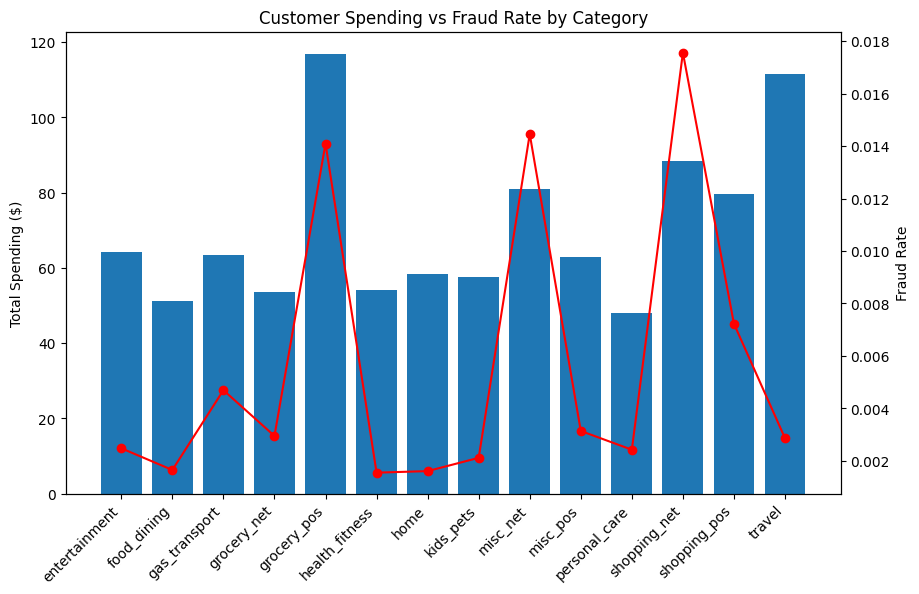

In [57]:
fraud_by_cat_amt = (
    df_viz_2.groupby("category")
    .agg(
        total_spent=("amt", "mean"),
        fraud_cases=("is_fraud", "sum"),
        total_transactions=("is_fraud", "count")
    )
    .reset_index()
)

fraud_by_cat_amt["fraud_rate"] = (
    fraud_by_cat_amt["fraud_cases"] / fraud_by_cat_amt["total_transactions"]
)

fig, ax1 = plt.subplots(figsize=(10,6))

# Bar for spending
ax1.bar(fraud_by_cat_amt["category"], fraud_by_cat_amt["total_spent"])
ax1.set_ylabel("Total Spending ($)")
ax1.set_xticklabels(fraud_by_cat_amt["category"], rotation=45, ha="right")

# Second axis for fraud rate
ax2 = ax1.twinx()
ax2.plot(fraud_by_cat_amt["category"], fraud_by_cat_amt["fraud_rate"], color="red", marker="o")
ax2.set_ylabel("Fraud Rate")

plt.title("Customer Spending vs Fraud Rate by Category")
plt.show()

### Fraud Rate by Amount, Category and Gender

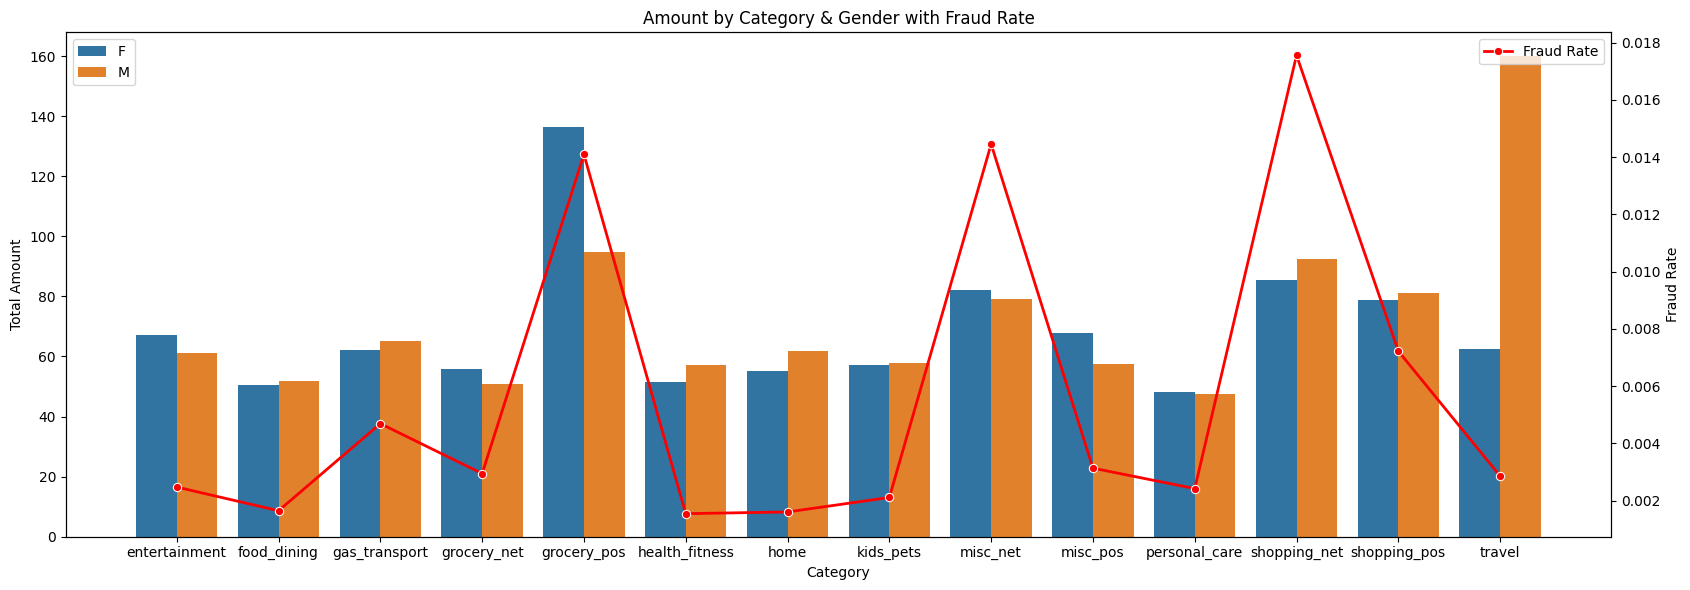

In [58]:
# --- Group data for bar plot ---
amt_group = df_viz_2.groupby(["category", "gender"])["amt"].mean().reset_index()

# --- Group data for fraud rate ---
fraud_group = df_viz_2.groupby("category")["is_fraud"].mean().reset_index()
# mean(is_fraud) = count(is_fraud==1)/total count

# --- Plot ---
fig, ax1 = plt.subplots(figsize=(17,6))

# Barplot: amount by category & gender
sns.barplot(data=amt_group, x="category", y="amt", hue="gender", ax=ax1)

# Secondary axis for fraud rate
ax2 = ax1.twinx()
sns.lineplot(data=fraud_group, x="category", y="is_fraud",
             marker="o", color="red", linewidth=2, ax=ax2, label="Fraud Rate")

# Labels
ax1.set_ylabel("Total Amount")
ax2.set_ylabel("Fraud Rate")
ax1.set_xlabel("Category")

# Show both legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.title("Amount by Category & Gender with Fraud Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Fraud Rate by Category Spending and Distance

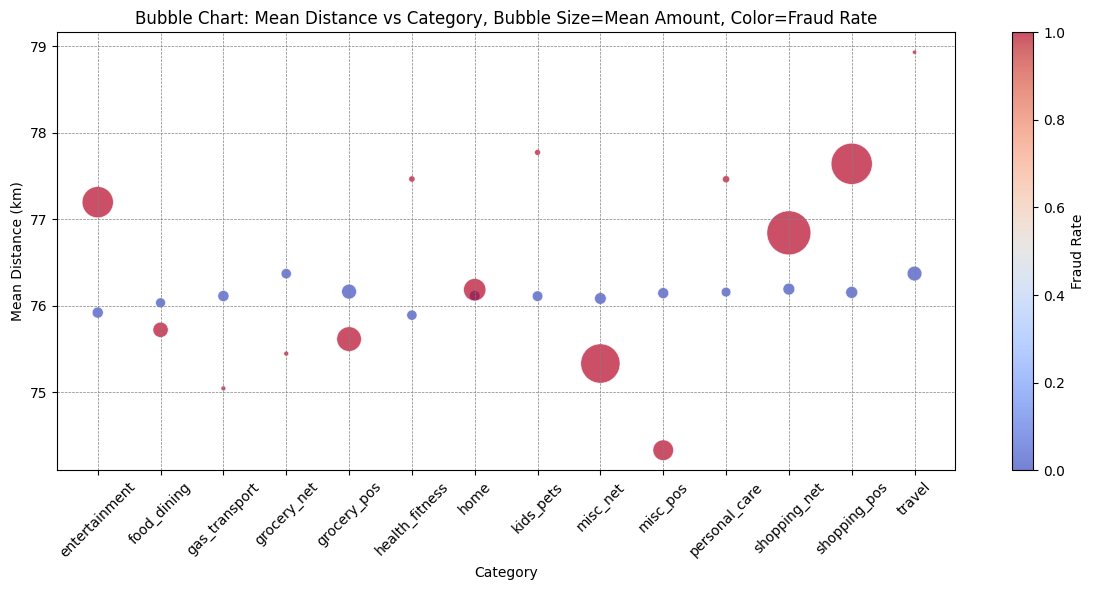

In [59]:
# --- Aggregate data ---
fraud_by_km_n_amt = df_viz_2.groupby(["category", "is_fraud"]).agg(
    mean_distance=("distance_km", "mean"),
    mean_amt=("amt", "mean"),
).reset_index()

# --- Bubble chart ---
plt.figure(figsize=(12,6))
scatter = plt.scatter(
    x=fraud_by_km_n_amt["category"],
    y=fraud_by_km_n_amt["mean_distance"],
    s=fraud_by_km_n_amt["mean_amt"],
    c=fraud_by_km_n_amt["is_fraud"],      # hue by fraud rate
    cmap="coolwarm",
    alpha=0.7,
    edgecolors="w",
    linewidth=0.5
)

plt.xlabel("Category")
plt.ylabel("Mean Distance (km)")
plt.title("Bubble Chart: Mean Distance vs Category, Bubble Size=Mean Amount, Color=Fraud Rate")
plt.xticks(rotation=45)

# Colorbar
cbar = plt.colorbar(scatter)
cbar.set_label("Fraud Rate")

plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

### Fraud Cases by State

In [60]:
df_state = df_viz_2.groupby("state")["is_fraud"].sum().reset_index()

fig = px.choropleth(df_state,
                    locations='state',
                    locationmode='USA-states',
                    color='is_fraud',
                    scope="usa",
                    color_continuous_scale="Reds",
                    labels={'is_fraud':'Fraud Rate'}
)
fig.update_layout(title_text="US Fraud Rate by State", geo_scope='usa')
fig.show()

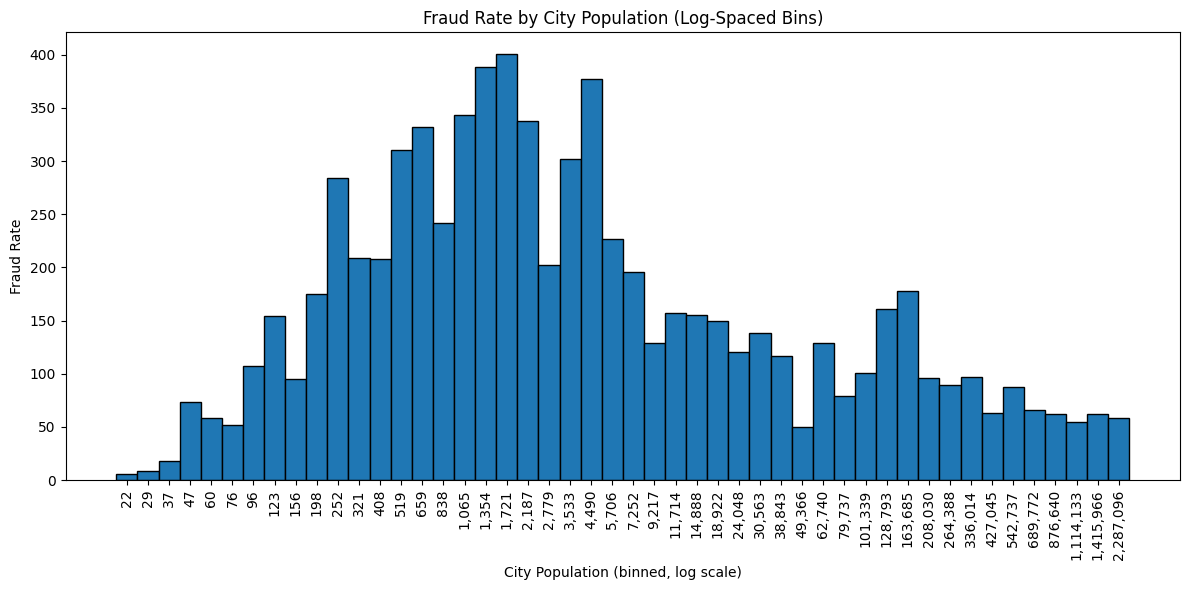

In [61]:
# Define log-spaced bins
bins = np.logspace(
    np.log10(df_viz_2["city_pop"].min()),
    np.log10(df_viz_2["city_pop"].max()),
    50
)

# Compute fraud rate per bin (on the fly, no new col in df)
fraud_rate = (
    df_viz_2.groupby(pd.cut(df_viz_2["city_pop"], bins, include_lowest=True), observed=True)["is_fraud"]
    .sum()
)

# Plot
plt.figure(figsize=(12,6))
plt.bar(
    range(len(fraud_rate)),
    fraud_rate,
    width=1.0,
    edgecolor='k'
)
plt.xticks(
    ticks=range(len(fraud_rate)),
    labels=[f"{int(interval.left):,}" for interval in fraud_rate.index],
    rotation=90
)
plt.xlabel("City Population (binned, log scale)")
plt.ylabel("Fraud Rate")
plt.title("Fraud Rate by City Population (Log-Spaced Bins)")
plt.tight_layout()
plt.show()

### Total Amount of Transactions by State

In [62]:
state_amt = df_viz_2.groupby("state").agg(
    total_amt=("amt", "sum"),
    total_transactions=("amt", "count")
).reset_index()

fig = px.choropleth(state_amt,
                    locations='state',
                    locationmode='USA-states',
                    color='total_amt',
                    scope="usa",
                    color_continuous_scale="Reds",
                    labels={'total_amt':'Total Amount'})

fig.update_layout(title_text="US Total Amount of Transactions by State", geo_scope='usa')
fig.show()

### Most Common Category by State

In [63]:
def mode_only(x):
    mode_val = x.mode()
    if not mode_val.empty:
        return mode_val[0]
    else:
        return None

state_order = df_viz_2["state"].value_counts().index

# Compute mode per state
state_mode = df_viz_2.groupby("state")["category"].apply(mode_only).reset_index()
state_mode.columns = ["state", "mode_category"]

fig = px.choropleth(
    state_mode,
    locations="state",          # State abbreviations or full names
    locationmode="USA-states",  # Tell plotly these are US states
    color="mode_category",      # Categorical variable
    scope="usa",
    title="Most Common Category by State",
    color_discrete_sequence=px.colors.qualitative.Set3  # Nice categorical palette
)

fig.update_layout(
    legend=dict(
        x=0.8,            # horizontal position (0 = left, 1 = right)
        y=0.6,            # vertical position (0 = bottom, 1 = top)
        xanchor="left",   # how the legend box is anchored horizontally
        yanchor="middle"  # how the legend box is anchored vertically
    )
)
fig.show()


### Fraud Rate by Credit card owned and House owned

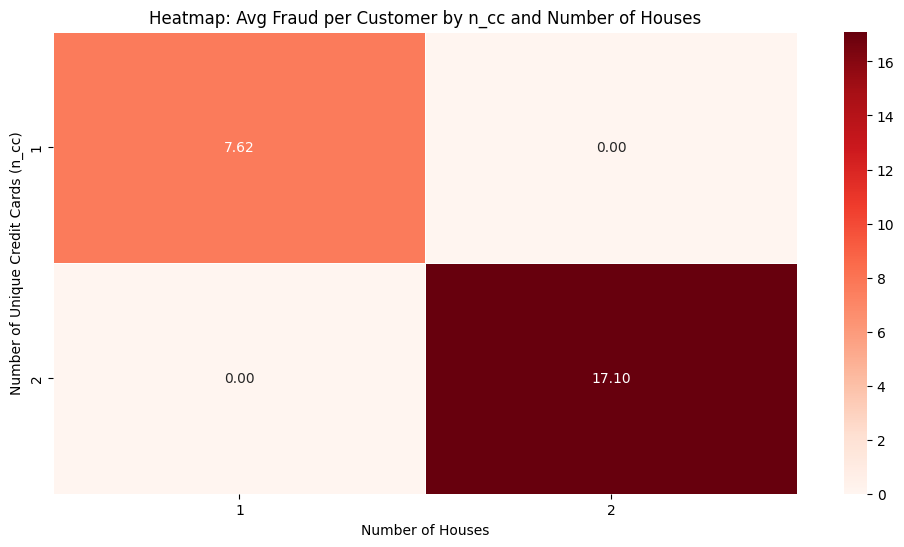

In [64]:
# --- Aggregate data per customer ---
customer_agg = df_viz_2.groupby(["customer_name", "n_cc"]).agg(
    n_house=("str_name", "nunique"),
    fraud_sum=("is_fraud", "sum")
).reset_index()

# --- Count number of customers per (n_cc, n_house) ---
customer_count = customer_agg.groupby(["n_cc", "n_house"])["customer_name"].count().reset_index(name="cust_count")

# --- Merge fraud_sum with customer_count ---
heatmap_df = customer_agg.groupby(["n_cc", "n_house"]).agg(fraud_sum=("fraud_sum","sum")).reset_index()
heatmap_df = heatmap_df.merge(customer_count, on=["n_cc", "n_house"])
heatmap_df["fraud_per_customer"] = heatmap_df["fraud_sum"] / heatmap_df["cust_count"]

# --- Create pivot table for heatmap ---
heatmap_data = heatmap_df.pivot(index="n_cc", columns="n_house", values="fraud_per_customer").fillna(0)

# --- Plot heatmap ---
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap="Reds", linewidths=0.5, annot=True, fmt=".2f")
plt.xlabel("Number of Houses")
plt.ylabel("Number of Unique Credit Cards (n_cc)")
plt.title("Heatmap: Avg Fraud per Customer by n_cc and Number of Houses")
plt.show()


### Fraud Rate by Gender

In [65]:
fraud_rate_gender = (
    df_viz_2.groupby("gender")["is_fraud"]
    .agg(["sum", "count"])
    .reset_index()
)

fraud_rate_gender["fraud_rate"] = (
    fraud_rate_gender["sum"] * 100 / fraud_rate_gender["count"]
)

print(fraud_rate_gender)

  gender   sum   count  fraud_rate
0      F  3735  709863    0.526158
1      M  3771  586812    0.642625


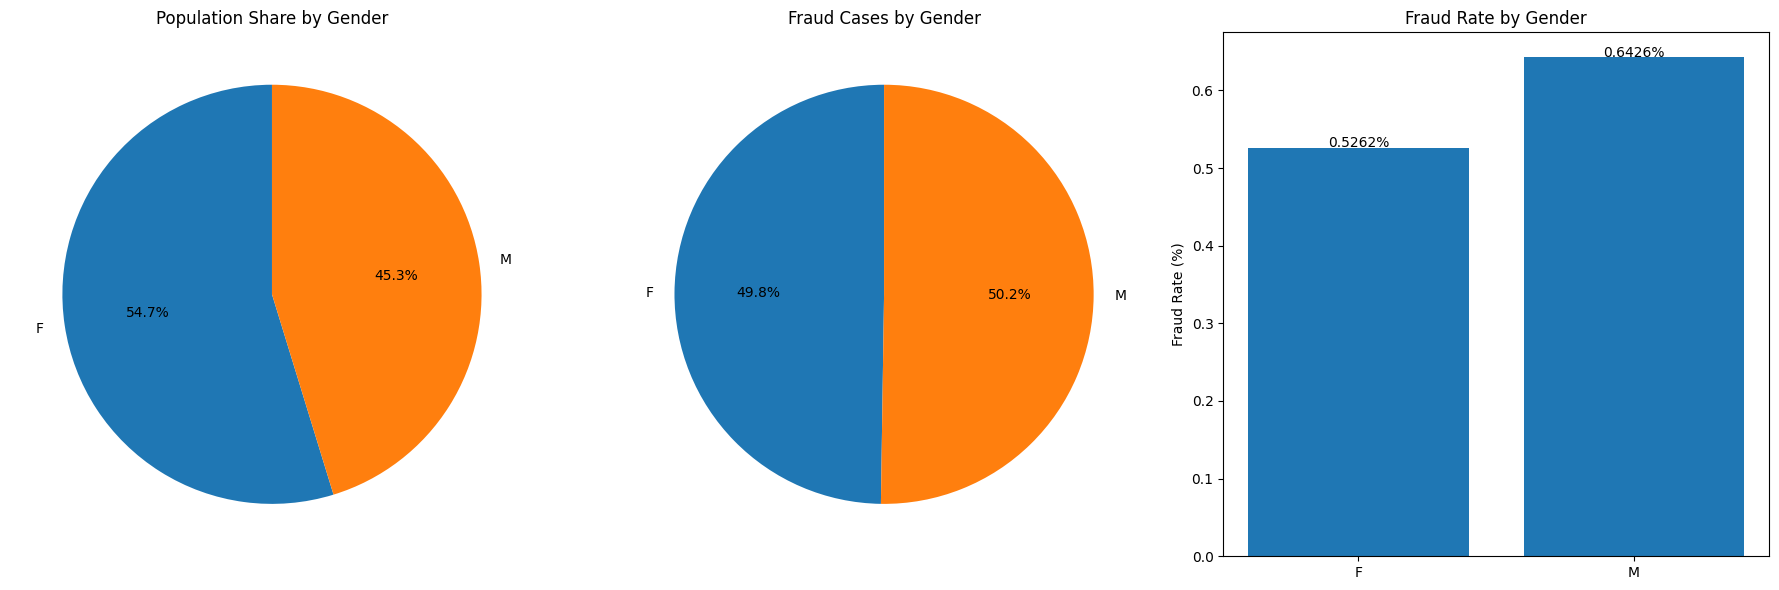

In [66]:
# --- Data prep ---
# Population distribution
pop_share = fraud_rate_gender.set_index("gender")["count"]

# Fraud case distribution
fraud_cases = fraud_rate_gender.set_index("gender")["sum"]

# Fraud rate (% of each gender)
fraud_rate = fraud_rate_gender.set_index("gender")["fraud_rate"]

# --- Plot ---
fig, axes = plt.subplots(1, 3, figsize=(18,6))

# 1. Population share
axes[0].pie(pop_share, labels=pop_share.index, autopct="%.1f%%", startangle=90)
axes[0].set_title("Population Share by Gender")

# 2. Fraud case share
axes[1].pie(fraud_cases, labels=fraud_cases.index, autopct="%.1f%%", startangle=90)
axes[1].set_title("Fraud Cases by Gender")

# 3. Fraud rate (better as bar than pie because values are very small)
axes[2].bar(fraud_rate.index, fraud_rate.values)
axes[2].set_title("Fraud Rate by Gender")
axes[2].set_ylabel("Fraud Rate (%)")
for i, v in enumerate(fraud_rate.values):
    axes[2].text(i, v + 0.001, f"{v:.4f}%", ha="center")  # show 4 decimals since ~0.05%

plt.tight_layout()
plt.show()

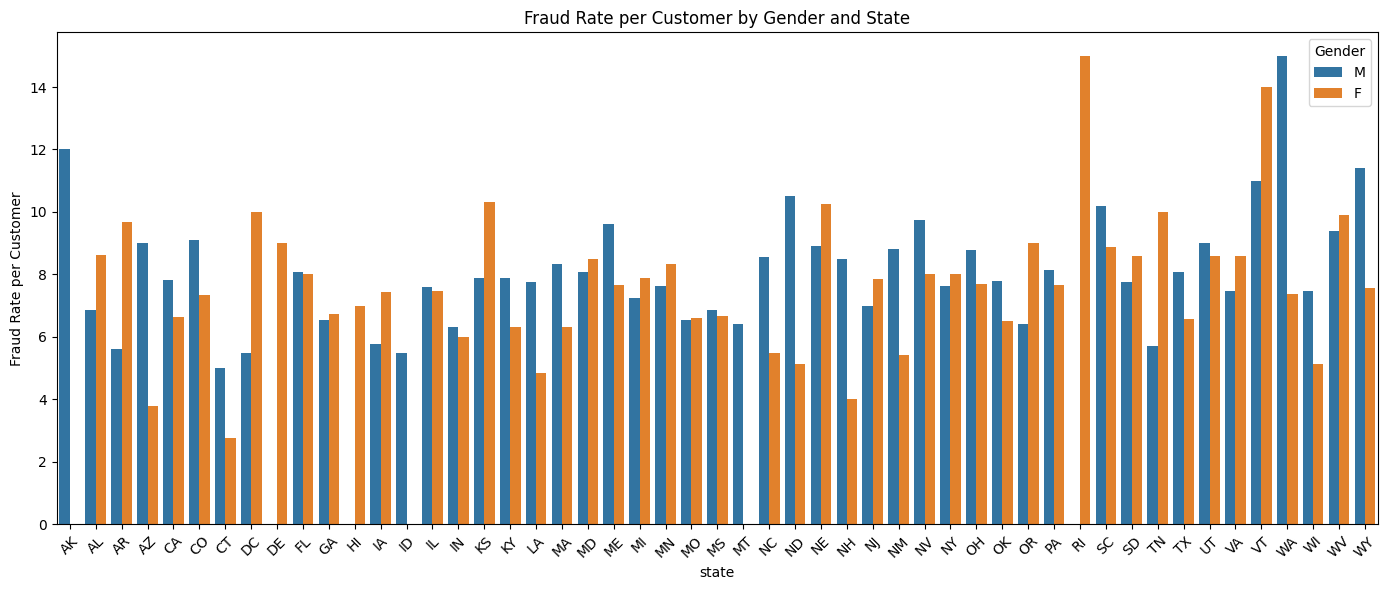

In [67]:
# --- Aggregate fraud per state and gender ---
state_gender_agg = df_viz_2.groupby(["state", "gender"]).agg(
    fraud_sum=("is_fraud", "sum"),
    cust_count=("customer_name", "nunique")  # unique customers
).reset_index()

# Compute fraud rate per customer
state_gender_agg["fraud_rate"] = state_gender_agg["fraud_sum"] / state_gender_agg["cust_count"]

plt.figure(figsize=(14,6))
sns.barplot(
    data=state_gender_agg,
    x="state",
    y="fraud_rate",
    hue="gender"
)
plt.xticks(rotation=45)
plt.ylabel("Fraud Rate per Customer")
plt.title("Fraud Rate per Customer by Gender and State")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

### Spending patterns based on age groups

/tmp/ipython-input-527289693.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



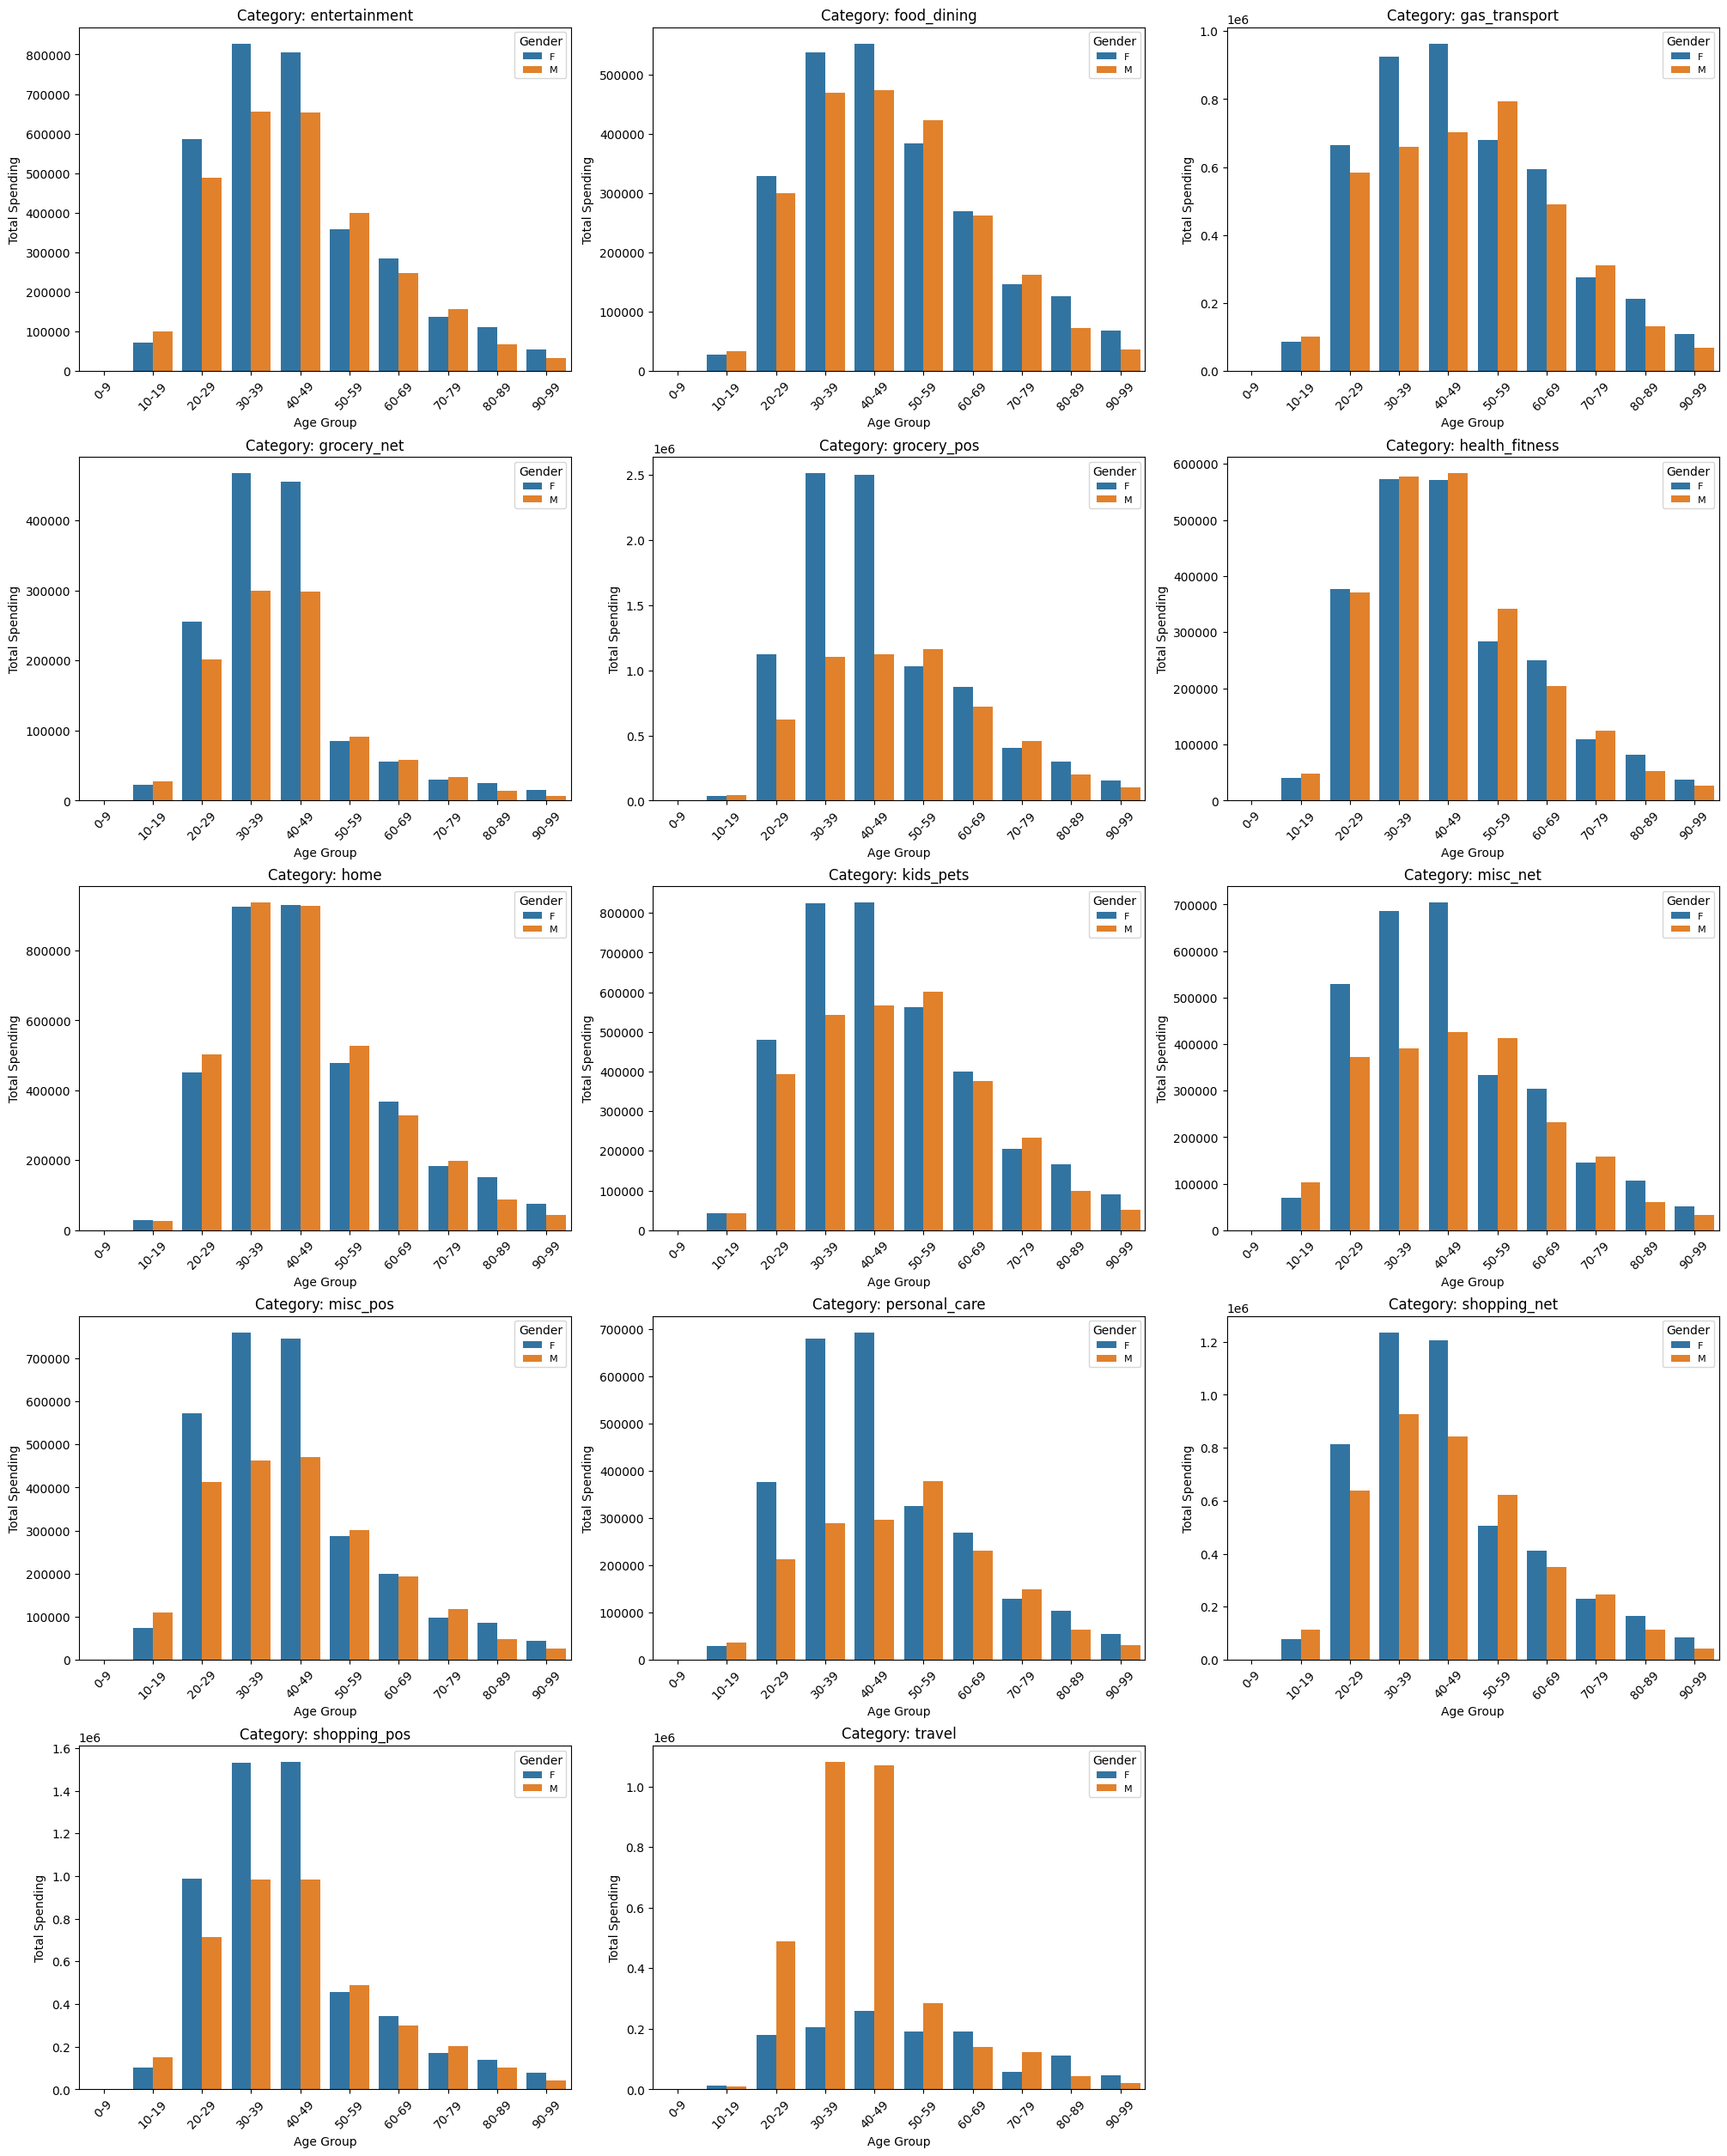

In [68]:
bins = range(0, df_viz_2["age"].max() + 10, 10)
labels = [f"{b}-{b+9}" for b in bins[:-1]]

agg = df_viz_2.groupby([
    pd.cut(df_viz_2["age"], bins=bins, labels=labels, right=False),
    "gender",
    "category"
]).agg(
    total_amt=("amt", "sum")
).reset_index()
agg.rename(columns={"age": "age_group"}, inplace=True)  # optional for clarity

# Get categories
categories = agg["category"].unique()

# Create figure with 5 rows × 3 cols
fig, axes = plt.subplots(5, 3, figsize=(20, 25), constrained_layout=True)

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through categories
for i, cat in enumerate(categories):
    ax = axes[i]
    cat_data = agg[agg["category"] == cat]

    sns.barplot(
        data=cat_data,
        x="age_group",
        y="total_amt",
        hue="gender",
        ax=ax
    )
    ax.set_title(f"Category: {cat}")
    ax.set_xlabel("Age Group")
    ax.set_ylabel("Total Spending")
    ax.tick_params(axis="x", rotation=45)
    ax.legend(title="Gender", fontsize=8)

# Hide unused subplots (if categories < 15)
for j in range(len(categories), len(axes)):
    fig.delaxes(axes[j])

plt.show()

### Fraud Probability for a a high amount transaction

In [69]:
# --- Compute median amount ---
median_amt = df_viz_2["amt"].median()

# --- Count high-amount frauds per customer (without modifying df) ---
high_amt_fraud_counts = df_viz_2.loc[(df_viz_2["amt"] > median_amt) & (df_viz_2["is_fraud"] == 1)]
customer_counts = high_amt_fraud_counts.groupby("customer_name").size().reset_index(name="num_high_amt_fraud")

# Average number of high-amount frauds per customer
avg_high_amt_fraud_per_customer = customer_counts["num_high_amt_fraud"].mean()

# Total number of high-amount transactions
total_high_amt = df_viz_2["amt"].loc[df_viz_2["amt"] > median_amt].mean()

# Compute ratio
ratio = avg_high_amt_fraud_per_customer*100 / total_high_amt

print(f"Probability that a transaction with higher than median amount is fradulent: {ratio:.2f}%")

Probability that a transaction with higher than median amount is fradulent: 6.37%


### Fraud Transaction by Hour

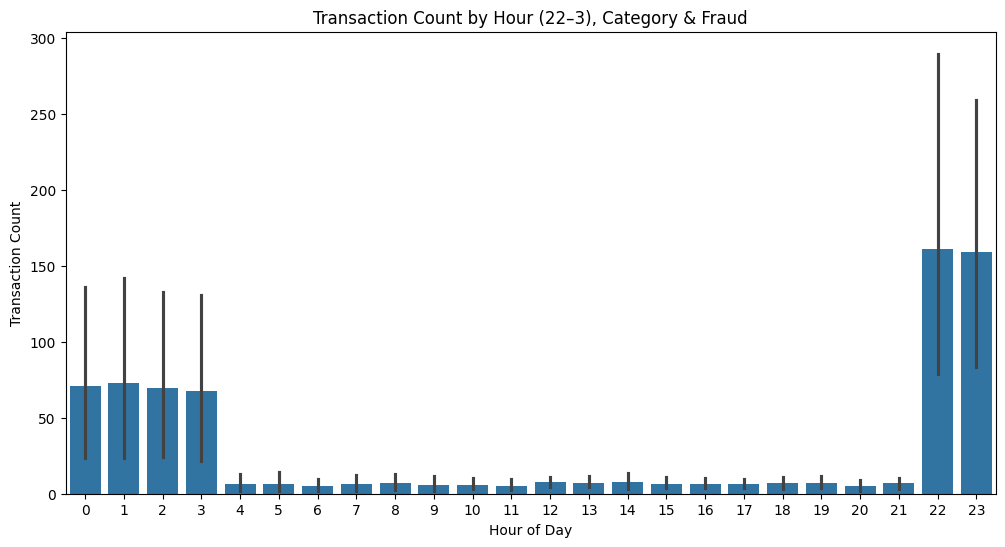

In [70]:
# Keep only night hours
night_hours = [22, 23, 0, 1, 2, 3]
# df_night = df_viz_2[df_viz_2["hour"].isin(night_hours)]
df_night = df_viz_2.copy()
df_fraud = df_night[df_night["is_fraud"] == 1]

# Group
grouped = (
    df_fraud.groupby(["hour", "category"])
    .agg(amount_sum=("amt", "sum"),
         count=("amt", "count"))
    .reset_index()
)

plt.figure(figsize=(12,6))
sns.barplot(
    data=grouped,
    x="hour", y="count"
)
plt.title("Transaction Count by Hour (22–3), Category & Fraud")
plt.ylabel("Transaction Count")
plt.xlabel("Hour of Day")
plt.show()

### Average Amount by Generation and Average Amount

In [71]:
agg_df1 = (
    df_viz_2[df_viz_2["is_fraud"] == 1].groupby(["customer_name", "str_number", "str_name", "str_type", "generation"])
    .agg(
        n_house=("building_type", lambda x: (x == "House").mean()),
        n_apt=("building_type", lambda x: (x == "Apt.").mean()),
        n_suite=("building_type", lambda x: (x == "Suite").mean()),
        avg_amt=("amt", "mean"),
    )
    .reset_index()
)

agg_df2 = (
    df_viz_2[df_viz_2["is_fraud"] == 0].groupby(["customer_name", "str_number", "str_name", "str_type", "generation"])
    .agg(
        n_house=("building_type", lambda x: (x == "House").mean()),
        n_apt=("building_type", lambda x: (x == "Apt.").mean()),
        n_suite=("building_type", lambda x: (x == "Suite").mean()),
        avg_amt=("amt", "mean"),
    )
    .reset_index()
)

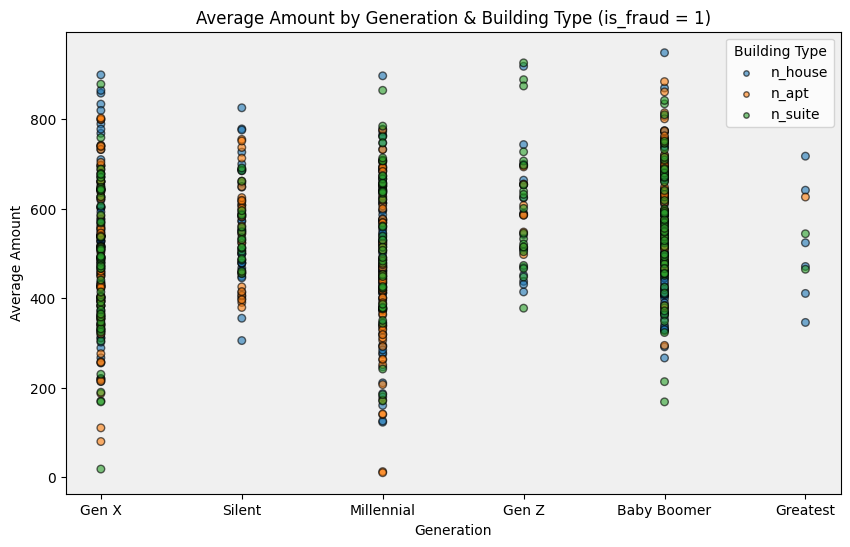

In [72]:
df_melted = agg_df1.melt(
    id_vars=["generation", "avg_amt"],
    value_vars=["n_house", "n_apt", "n_suite"],
    var_name="building_type",
    value_name="count"
)

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)

plt.figure(figsize=(10,6))

ax = plt.gca()   # get current axes

# change plot area (inside the axes) color
ax.set_facecolor("#f0f0f0")   # light gray background
for b_type in df_melted["building_type"].unique():
    subset = df_melted[df_melted["building_type"] == b_type]
    plt.scatter(
        subset["generation"], subset["avg_amt"],
        s=subset["count"]*30,   # scale bubble size
        alpha=0.6,
        label=b_type,
        edgecolor="black"
    )

plt.title("Average Amount by Generation & Building Type (is_fraud = 1)")
plt.xlabel("Generation")
plt.ylabel("Average Amount")
plt.legend(title="Building Type")
plt.show()

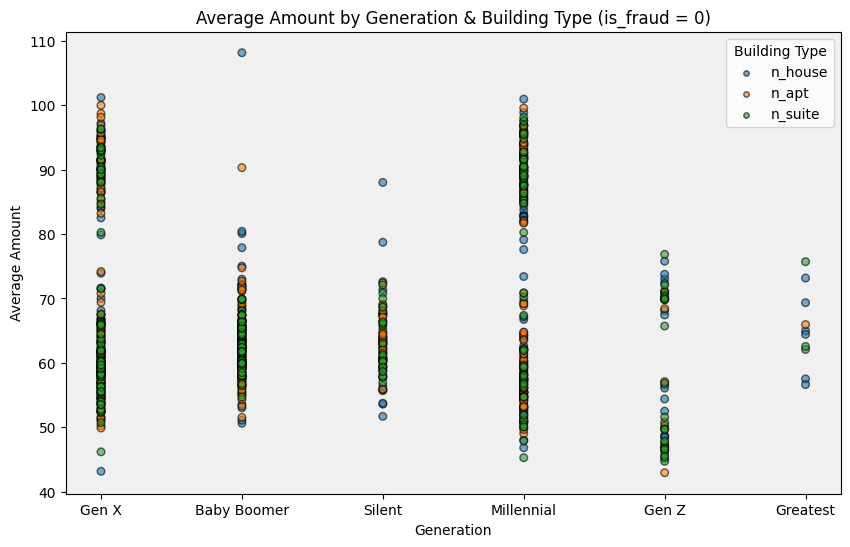

In [73]:
df_melted = agg_df2.melt(
    id_vars=["generation", "avg_amt"],
    value_vars=["n_house", "n_apt", "n_suite"],
    var_name="building_type",
    value_name="count"
)

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)

plt.figure(figsize=(10,6))

ax = plt.gca()   # get current axes

# change plot area (inside the axes) color
ax.set_facecolor("#f0f0f0")   # light gray background
for b_type in df_melted["building_type"].unique():
    subset = df_melted[df_melted["building_type"] == b_type]
    plt.scatter(
        subset["generation"], subset["avg_amt"],
        s=subset["count"]*30,   # scale bubble size
        alpha=0.6,
        label=b_type,
        edgecolor="black"
    )

plt.title("Average Amount by Generation & Building Type (is_fraud = 0)")
plt.xlabel("Generation")
plt.ylabel("Average Amount")
plt.legend(title="Building Type")
plt.show()

### Day vs Night


In [74]:
def categorize_time_of_day(hour):
    if 18 <= hour or hour < 6:
        return 'Night'
    else:
        return 'Day'

df_viz_2['time_of_day'] = df_viz_2['hour'].apply(categorize_time_of_day)

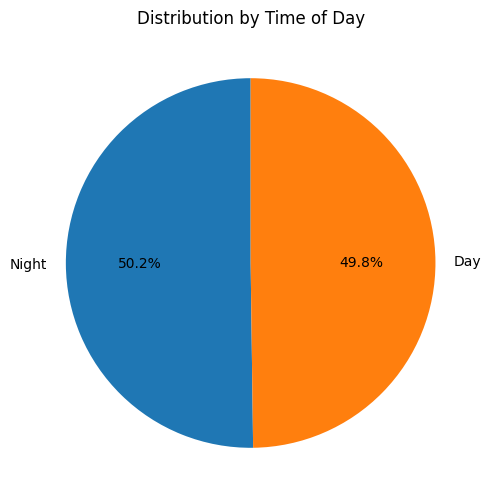

In [75]:
# Count occurrences of each time_of_day
time_counts = df_viz_2["time_of_day"].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(
    time_counts,
    labels=time_counts.index,
    autopct="%.1f%%",
    startangle=90
)
plt.title("Distribution by Time of Day")
plt.show()

Distribution of fraud by time of day

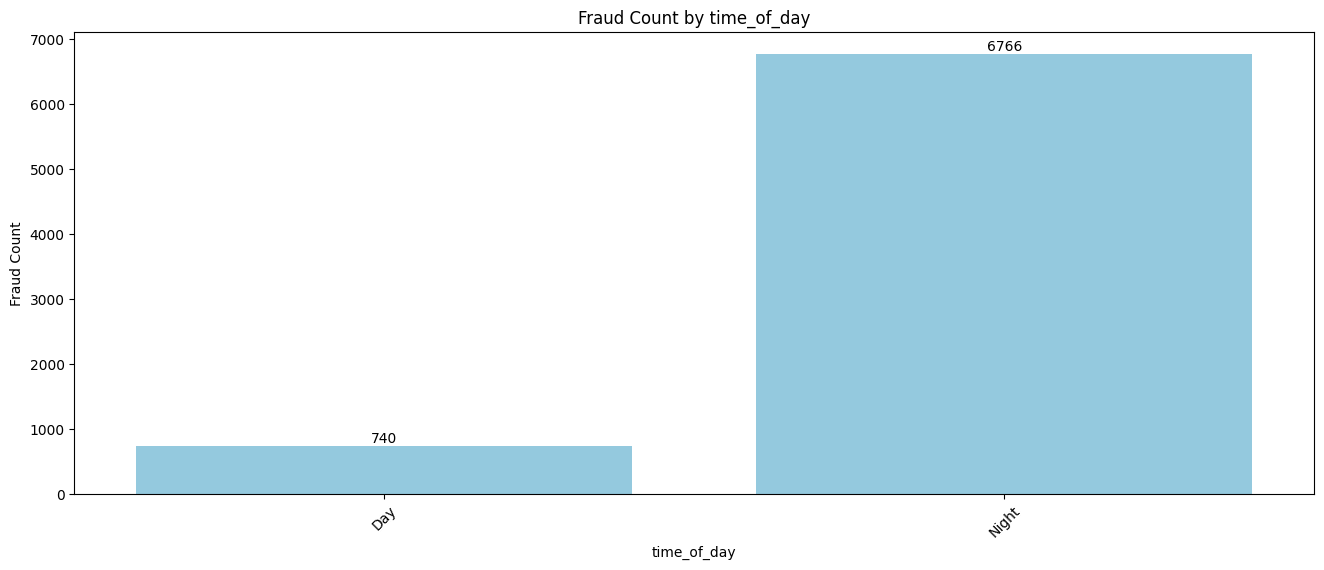

In [76]:
fraud_countplot(df_viz_2, 'time_of_day')

### Amount vs fraud

In [77]:
df.groupby("is_fraud")["amt"].describe()

,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,1289169.0,67.667110,154.007971,1.00,9.6100,47.280,82.540,28948.90
1,7506.0,531.320092,390.560070,1.06,245.6625,396.505,900.875,1376.04


In [78]:
from scipy.stats import pointbiserialr
corr, pval = pointbiserialr(df["amt"], df["is_fraud"])
print(corr, pval)

0.2194038889588689 0.0


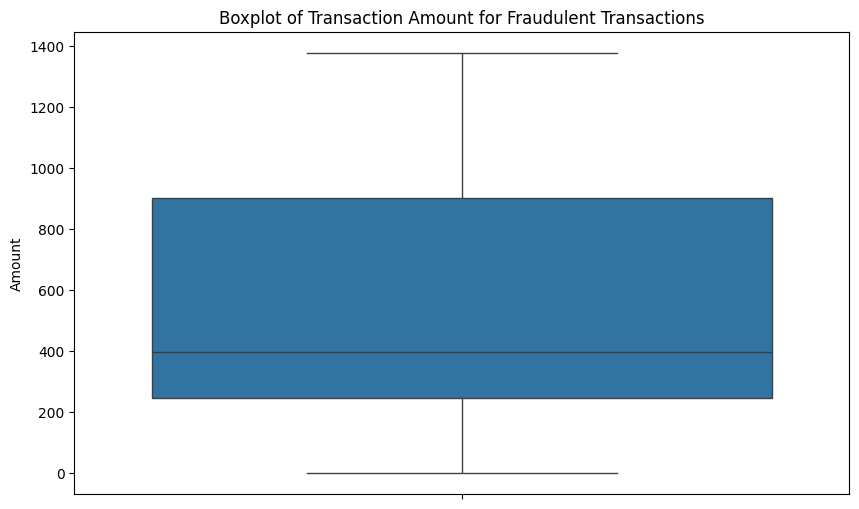

In [79]:
# Filter the DataFrame to include only fraudulent transactions
fraud_df = df_viz_2[df_viz_2['is_fraud'] == 1]

plt.figure(figsize=(10, 6))
sns.boxplot(y=fraud_df['amt'])
plt.title('Boxplot of Transaction Amount for Fraudulent Transactions')
plt.ylabel('Amount')
plt.show()

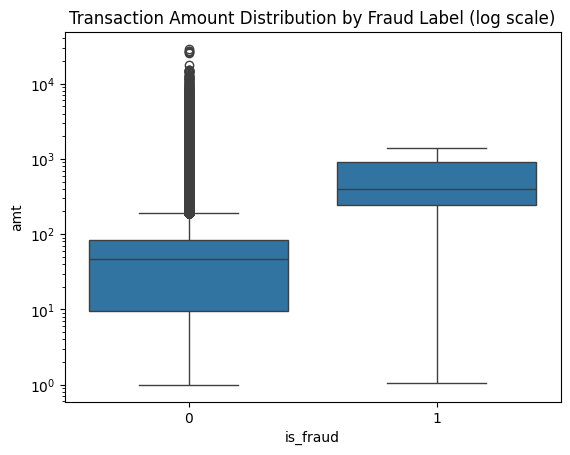

/tmp/ipython-input-3897882132.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



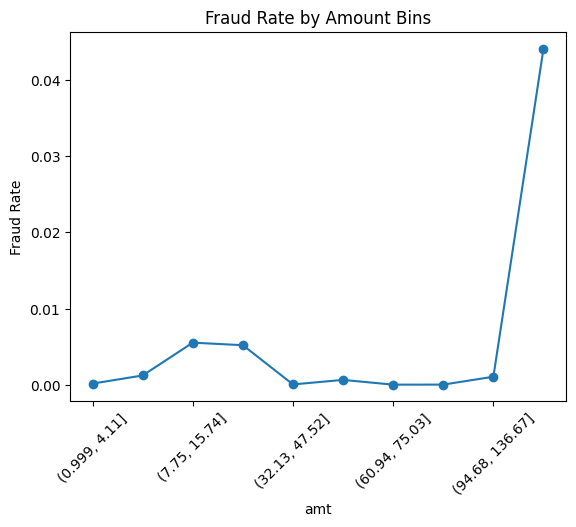

Correlation: 0.2194038889588689 p-value: 0.0


In [96]:
sns.boxplot(x="is_fraud", y="amt", data=df_viz_2)
plt.yscale("log")
plt.title("Transaction Amount Distribution by Fraud Label (log scale)")
plt.show()

# --- Fraud rate by amount bins (quantiles) ---
amount_bins = pd.qcut(df_viz_2["amt"], q=10)  # 10 quantile bins
fraud_rate = df_viz_2.groupby(amount_bins)["is_fraud"].mean()

fraud_rate.plot(kind="line", marker="o", title="Fraud Rate by Amount Bins")
plt.ylabel("Fraud Rate")
plt.xticks(rotation=45)
plt.show()

# --- Point-biserial correlation ---
corr, pval = pointbiserialr(df_viz_2["amt"], df_viz_2["is_fraud"])
print("Correlation:", corr, "p-value:", pval)

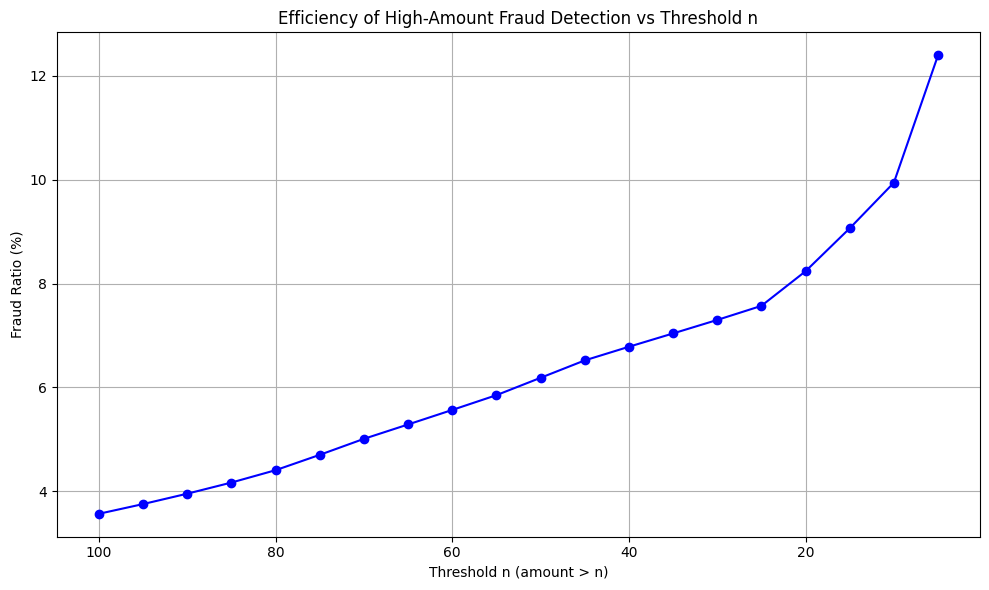

In [107]:
# Store results
thresholds = np.arange(100, 0, -5)  # from 100 down to 1, step -5
ratios = []

for n in thresholds:
    # High amount fraud subset
    high_amt_fraud_counts = df_viz_2.loc[(df_viz_2["amt"] > n) & (df_viz_2["is_fraud"] == 1)]
    customer_counts = high_amt_fraud_counts.groupby("customer_name").size().reset_index(name="num_high_amt_fraud")

    # Average number of high-amount frauds per customer
    avg_high_amt_fraud_per_customer = customer_counts["num_high_amt_fraud"].mean() if not customer_counts.empty else 0

    # Total number of high-amount transactions
    total_high_amt = df_viz_2.loc[df_viz_2["amt"] > n, "amt"].mean()

    # Compute ratio safely
    if total_high_amt and not np.isnan(total_high_amt):
        ratio = avg_high_amt_fraud_per_customer * 100 / total_high_amt
    else:
        ratio = 0

    ratios.append(ratio)

# Plot line chart
plt.figure(figsize=(10, 6))
plt.plot(thresholds, ratios, marker="o", linestyle="-", color="blue")

plt.title("Efficiency of High-Amount Fraud Detection vs Threshold n")
plt.xlabel("Threshold n (amount > n)")
plt.ylabel("Fraud Ratio (%)")
plt.gca().invert_xaxis()  # so 100 → 1 goes left → right
plt.grid(True)
plt.tight_layout()
plt.show()

### Analyze fraud rate by time difference


In [81]:
# Sắp xếp dữ liệu theo thẻ và thời gian
df_viz_date = df_viz_2.sort_values(by=["cc_num", "trans_date_trans_time"])

# Tính khoảng thời gian (delta) giữa 2 giao dịch liên tiếp của cùng 1 thẻ
df_viz_date["prev_txn_date"] = df_viz_date.groupby("cc_num")["trans_date_trans_time"].shift(1)
df_viz_date["time_delta"] = (df_viz_date["trans_date_trans_time"] - df_viz_date["prev_txn_date"]).dt.total_seconds() / 3600  # tính theo giờ

/tmp/ipython-input-3246032655.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



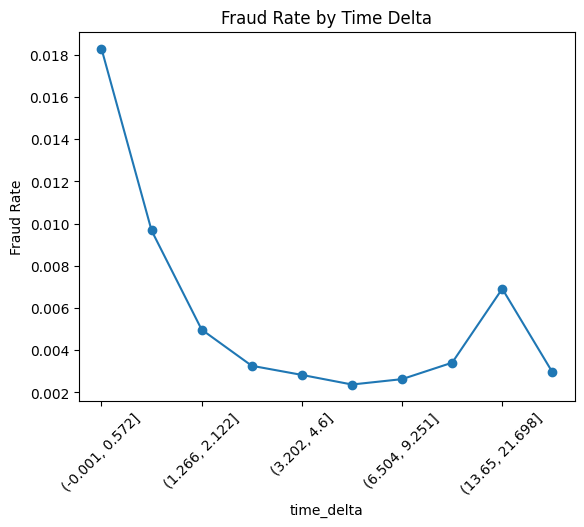

In [82]:
# Create quantile bins on the fly
time_bins = pd.qcut(df_viz_date["time_delta"].dropna(), q=10)

# Group by bins and compute fraud rate
fraud_rate_by_bin = df_viz_date.groupby(time_bins)["is_fraud"].mean()

# Plot
fraud_rate_by_bin.plot(kind="line", marker="o", title="Fraud Rate by Time Delta")
plt.ylabel("Fraud Rate")
plt.xticks(rotation=45)
plt.show()

In [83]:
from scipy.stats import pointbiserialr

corr, pval = pointbiserialr(df_viz_date["time_delta"].dropna(), df_viz_date["is_fraud"].loc[df_viz_date["time_delta"].notna()])
print("Correlation:", corr)
print("p-value:", pval)

Correlation: -0.017883453941088354
p-value: 3.937944204210055e-92


### Phan cua Dat


In [84]:
oldest_dob = df_viz_2['dob'].min()
print(f"The oldest person in the dataset was born on: {oldest_dob.strftime('%Y-%m-%d')}")

The oldest person in the dataset was born on: 1924-10-30


In [85]:
youngest_dob = df_viz_2['dob'].max()
print(youngest_dob)

2005-01-29 00:00:00


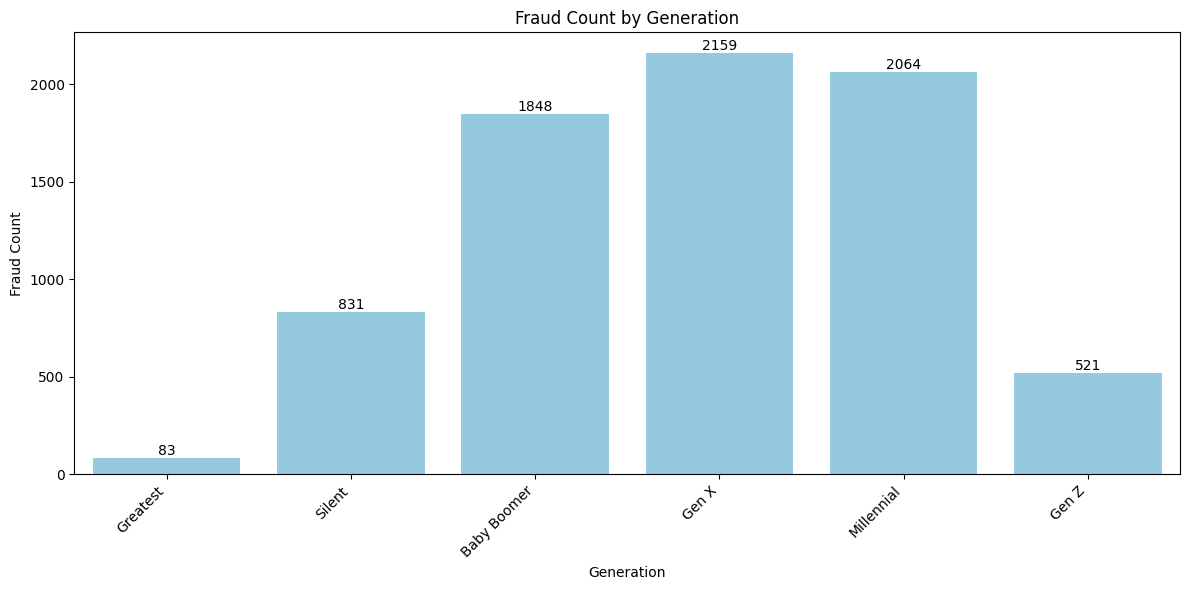

In [86]:
def categorize_generation(year):
    if 1924 <= year <= 1945:
        return "The Silent Generation: 1924-1945"
    elif 1946 <= year <= 1964:
        return "Baby Boomer: 1946-1964"
    elif 1965 <= year <= 1979:
        return "Gen X: 1965-1979"
    elif 1980 <= year <= 1994:
        return "Millennials: 1980-1994"
    else:
        return "Gen Z: 1995+"

# df_viz_2['generations'] = df_viz_dob['dob_year'].apply(categorize_generation)

fraud_by_generation = df_viz_2.groupby('generation')['is_fraud'].sum().reset_index()

# Define the desired order of generations
generation_order = [
    "Greatest",
    "Silent",
    "Baby Boomer",
    "Gen X",
    "Millennial",
    "Gen Z"
]

# # Convert 'generation' to a categorical type with the specified order
fraud_by_generation['generation'] = pd.Categorical(
    fraud_by_generation['generation'], categories=generation_order, ordered=True
)

# Sort by the categorical 'generation' column
fraud_by_generation = fraud_by_generation.sort_values('generation')

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=fraud_by_generation,
    x='generation',
    y='is_fraud',
    color='skyblue'
)

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center", va="bottom",
        fontsize=10, color="black", rotation=0
    )

plt.title("Fraud Count by Generation")
plt.xlabel("Generation")
plt.ylabel("Fraud Count")
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.show()

In [87]:
fraud_customers = (
    df_viz_2[df_viz_2["is_fraud"] == 1]
    .groupby("generation")["customer_name"]
    .nunique()
    .reset_index(name="n_customers_with_fraud")
)

total_customers = (
    df_viz_2.groupby("generation")["customer_name"]
    .nunique()
    .reset_index(name="n_customers")
)

fraud_by_generation = fraud_customers.merge(total_customers, on="generation")

count_fraud_generation = fraud_by_generation.copy()

fraud_by_generation["fraud_ratio"] = (
    fraud_by_generation["n_customers_with_fraud"]
    / fraud_by_generation["n_customers"]
)

In [88]:
count_fraud_generation

,generation,n_customers_with_fraud,n_customers
0,Baby Boomer,201,253
1,Gen X,215,286
2,Gen Z,46,58
3,Greatest,9,12
4,Millennial,206,270
5,Silent,82,101


In [89]:
fraud_by_generation

,generation,n_customers_with_fraud,n_customers,fraud_ratio
0,Baby Boomer,201,253,0.794466
1,Gen X,215,286,0.751748
2,Gen Z,46,58,0.793103
3,Greatest,9,12,0.750000
4,Millennial,206,270,0.762963
5,Silent,82,101,0.811881


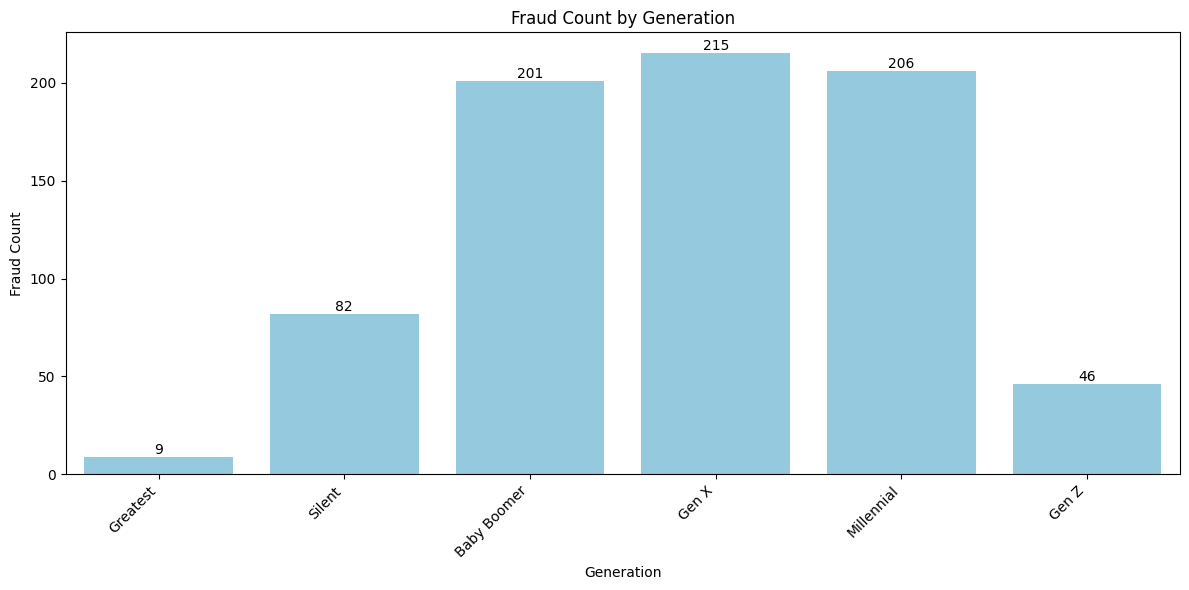

In [90]:
# Define the desired order of generations
generation_order = [
    "Greatest",
    "Silent",
    "Baby Boomer",
    "Gen X",
    "Millennial",
    "Gen Z"
]

# # Convert 'generation' to a categorical type with the specified order
count_fraud_generation['generation'] = pd.Categorical(
    count_fraud_generation['generation'], categories=generation_order, ordered=True
)

# Sort by the categorical 'generation' column
count_fraud_generation = count_fraud_generation.sort_values('generation')

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=count_fraud_generation,
    x='generation',
    y='n_customers_with_fraud',
    color='skyblue'
)

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center", va="bottom",
        fontsize=10, color="black", rotation=0
    )

plt.title("Fraud Count by Generation")
plt.xlabel("Generation")
plt.ylabel("Fraud Count")
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.show()

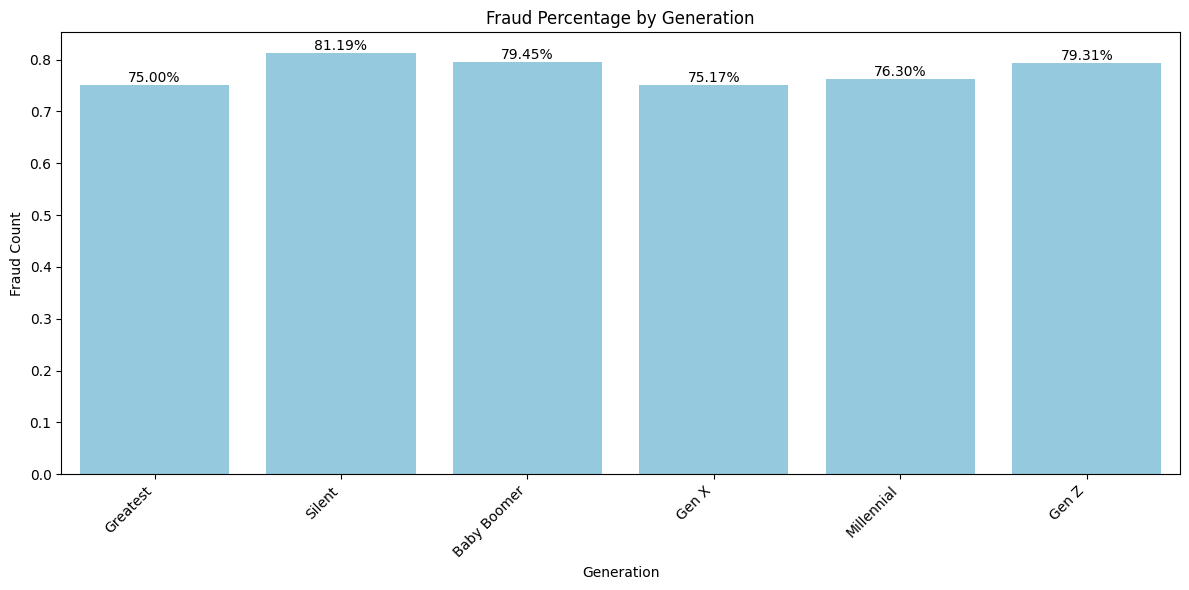

In [91]:
# Define the desired order of generations
generation_order = [
    "Greatest",
    "Silent",
    "Baby Boomer",
    "Gen X",
    "Millennial",
    "Gen Z"
]

# # Convert 'generation' to a categorical type with the specified order
fraud_by_generation['generation'] = pd.Categorical(
    fraud_by_generation['generation'], categories=generation_order, ordered=True
)

# Sort by the categorical 'generation' column
fraud_by_generation = fraud_by_generation.sort_values('generation')

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=fraud_by_generation,
    x='generation',
    y='fraud_ratio',
    color='skyblue'
)

# Add ratio labels on top of bars (as %)
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2%}",  # format as percentage
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center", va="bottom",
        fontsize=10, color="black"
    )

plt.title("Fraud Percentage by Generation")
plt.xlabel("Generation")
plt.ylabel("Fraud Count")
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.show()

# Data Preprocessing

# Data Sampling

In [ ]:
df_up

# Data Transforming

# Train Regressor